## 정형 + 비정형 데이터융합 및 금리예측 분석

In [1]:
# 한 셀에서 여러 개의 결과값 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 데이터 준비 및 확인

In [3]:
import pandas as pd 

integrated_df= pd.read_csv('./data/merge_data.csv')
print(integrated_df.shape)
integrated_df[:204]

(204, 56)


,Unnamed: 0,datetime,unemployment,employment,coincident,leading_price,business_survey,ESI,industrial_production,capital_investment,...,capital_account,financial_account,us_retail_sales,us_industrial_production,us_consumer_sentiment,us_GDP,us_CPI,household_credit,economic_growth_rate,summary
0,0,08-Jan,3.3,"23,141",102.5,101.2,83,112.3,77.7,68.6,...,-0.9,"-1,881.20",0.3,-0.1,78.4,-1.7,4.1,"677,198.70",0.8,통화정책방향 한국은행 보도자료콜금리 목표를 현 수준 연 에서 유지하기로 의결하였음 ...
1,1,08-Feb,3.5,"23,065",102.5,100.6,83,114.7,73.2,66.0,...,1.5,"-2,244.90",-0.9,-0.4,70.8,-1.7,4.1,"677,198.70",0.8,한국은행 보도자료콜금리 목표를 현 수준 연 에서 유지하기로 의결하였음 붙임 참조 국...
2,2,08-Mar,3.4,"23,490",102.4,100.2,81,107.3,80.5,77.6,...,-3.8,"-1,093.90",0.2,-0.3,69.5,-1.7,4.1,"677,198.70",0.8,통화정책방향 금융통화위원회는현재의 콜금리 목표와 같 은 국제금융시장 불안 등의 영향...
3,3,08-Apr,3.2,"23,907",102.1,100.0,85,109.0,79.4,76.0,...,-0.2,"-2,647.50",0.0,-0.7,62.6,2.4,4.4,"698,226.90",0.4,통화정책방향 금융통화위원회는로 하 였음 붙임 참조 이었음 외환은행 보도자료
4,4,08-May,3.1,"24,144",101.8,99.7,82,104.1,79.9,73.2,...,9.3,"-2,278.40",0.9,-0.6,59.8,2.4,4.4,"698,226.90",0.4,금융통화위원회는한국은행 기준금리를 현 수준에서 유지 하기로 하였음 최근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,24-Aug,1.9,"28,801",98.2,100.6,70,94.5,110.8,104.2,...,-2.7,"4,544.40",-0.1,0.5,67.9,3.1,2.6,"1,913,814.30",0.1,통화정책방향 결정시까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 물가...
200,200,24-Sep,2.1,"28,842",98.1,100.7,70,94.0,110.9,111.7,...,-3.1,"12,785.50",0.9,-0.4,70.1,3.1,2.6,"1,913,814.30",0.1,통화정책방향 결정시까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 물가...
201,201,24-Oct,2.3,"28,847",98.1,100.6,69,92.8,113.6,109.6,...,7.2,"12,587.90",0.6,-0.5,70.5,2.3,2.7,"1,927,259.80",0.1,과장금융중개지원대출 관련 문의처 통화정책의 긴축 정도를 소폭 축소 세계경제는 완만한...
202,202,24-Nov,2.2,"28,821",97.6,100.8,69,93.0,114.1,114.5,...,-9.9,"10,808.80",0.7,-0.1,71.8,2.3,2.7,"1,927,259.80",0.1,과장금융중개지원대출 관련 문의처 성장의 하방압력이 증대되었다 이에 따라 기준금리를 ...


In [31]:
#EDA후 정리된 데이터
clean_df = pd.read_csv('./data/lagged_data_df.csv')
clean_df

,id,unemployment,coincident,leading_price,ESI,export_price,current_account,GDP,land_price_change,CCSI,...,us_policy_rate,kosdaq_index,capital_account,us_industrial_production,us_consumer_sentiment,us_CPI,economic_growth_rate,interest_rate,datetime,created_at
0,1,0.274413,-1.906690,-1.302750,-0.448542,1.352840,-1.220150,-1.60339,-0.064170,-2.559780,...,-0.658634,-1.095060,-0.165806,-0.084170,-0.036435,1.393000,0.131284,1.09861,09-Jul,2025-03-27 09:33:46
1,2,0.759790,-2.090250,-1.489570,0.419834,1.187990,-0.000118,-1.47343,0.080638,-0.818807,...,-0.658634,-0.976000,0.170232,-0.308135,-0.610507,1.393000,0.131284,1.09861,09-Aug,2025-03-27 09:33:46
2,3,0.921583,-1.998470,-1.676400,0.026035,1.710140,0.194846,-1.47343,0.649011,-0.915528,...,-0.658634,-0.911820,-0.192960,-0.233480,-0.708704,1.393000,0.131284,1.09861,09-Sep,2025-03-27 09:33:46
3,4,0.597998,-1.906690,-2.050050,-1.569350,2.625860,-0.472724,-1.47343,0.439039,-2.172900,...,-0.658634,-0.966141,0.024276,-0.532099,-1.229900,-0.435267,-0.304195,1.09861,09-Oct,2025-03-27 09:33:46
4,5,0.597998,-1.906690,-2.517120,-2.710360,2.201230,-0.676970,-1.18173,0.406457,-2.656500,...,-0.658634,-1.086940,-0.087736,-0.457445,-1.441400,-0.435267,-0.304195,1.09861,09-Nov,2025-03-27 09:33:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,-0.372757,0.204256,-0.742268,-0.357666,0.508757,0.360830,1.48521,0.051677,0.245121,...,2.495740,0.876841,2.183060,0.065140,-0.905097,0.503573,-0.304195,1.50408,24-Aug,2025-03-27 09:33:46
182,183,-0.696342,-0.071085,-0.555441,-0.488932,0.696905,0.498364,1.48521,0.044436,-0.045041,...,2.495740,0.656770,-0.108102,-0.009515,-1.275220,0.503573,-0.304195,1.50408,24-Sep,2025-03-27 09:33:46
183,184,-0.696342,-0.162865,-0.368615,-0.589906,0.769403,-0.889614,1.48521,0.037196,-0.238483,...,2.195320,0.633330,1.439710,0.289105,-1.146810,0.355335,-0.086456,1.44692,24-Oct,2025-03-27 09:33:46
184,185,-0.696342,-0.713547,-0.088376,-0.650490,0.399147,1.029310,1.83565,0.044436,-0.335204,...,2.195320,0.504227,5.679210,-0.158825,-1.501830,0.355335,-0.086456,1.38629,24-Nov,2025-03-27 09:33:46


In [35]:
# datetime을 기준으로 integrated_df['summary']와 clean_df를 병합
df = pd.merge(clean_df, integrated_df[['datetime', 'summary']], on='datetime', how='left')
df

,id,unemployment,coincident,leading_price,ESI,export_price,current_account,GDP,land_price_change,CCSI,...,kosdaq_index,capital_account,us_industrial_production,us_consumer_sentiment,us_CPI,economic_growth_rate,interest_rate,datetime,created_at,summary
0,1,0.274413,-1.906690,-1.302750,-0.448542,1.352840,-1.220150,-1.60339,-0.064170,-2.559780,...,-1.095060,-0.165806,-0.084170,-0.036435,1.393000,0.131284,1.09861,09-Jul,2025-03-27 09:33:46,통화정책방향 까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 부동산시장...
1,2,0.759790,-2.090250,-1.489570,0.419834,1.187990,-0.000118,-1.47343,0.080638,-0.818807,...,-0.976000,0.170232,-0.308135,-0.610507,1.393000,0.131284,1.09861,09-Aug,2025-03-27 09:33:46,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 부동산가격...
2,3,0.921583,-1.998470,-1.676400,0.026035,1.710140,0.194846,-1.47343,0.649011,-0.915528,...,-0.911820,-0.192960,-0.233480,-0.708704,1.393000,0.131284,1.09861,09-Sep,2025-03-27 09:33:46,금융통화위원회는까지 한국은행 기준금리를 현 수준에서 유지 하여 통화정책을 운용하기로...
3,4,0.597998,-1.906690,-2.050050,-1.569350,2.625860,-0.472724,-1.47343,0.439039,-2.172900,...,-0.966141,0.024276,-0.532099,-1.229900,-0.435267,-0.304195,1.09861,09-Oct,2025-03-27 09:33:46,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 통화정책은...
4,5,0.597998,-1.906690,-2.517120,-2.710360,2.201230,-0.676970,-1.18173,0.406457,-2.656500,...,-1.086940,-0.087736,-0.457445,-1.441400,-0.435267,-0.304195,1.09861,09-Nov,2025-03-27 09:33:46,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 통화정책은...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,-0.372757,0.204256,-0.742268,-0.357666,0.508757,0.360830,1.48521,0.051677,0.245121,...,0.876841,2.183060,0.065140,-0.905097,0.503573,-0.304195,1.50408,24-Aug,2025-03-27 09:33:46,통화정책방향 결정시까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 물가...
182,183,-0.696342,-0.071085,-0.555441,-0.488932,0.696905,0.498364,1.48521,0.044436,-0.045041,...,0.656770,-0.108102,-0.009515,-1.275220,0.503573,-0.304195,1.50408,24-Sep,2025-03-27 09:33:46,통화정책방향 결정시까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 물가...
183,184,-0.696342,-0.162865,-0.368615,-0.589906,0.769403,-0.889614,1.48521,0.037196,-0.238483,...,0.633330,1.439710,0.289105,-1.146810,0.355335,-0.086456,1.44692,24-Oct,2025-03-27 09:33:46,과장금융중개지원대출 관련 문의처 통화정책의 긴축 정도를 소폭 축소 세계경제는 완만한...
184,185,-0.696342,-0.713547,-0.088376,-0.650490,0.399147,1.029310,1.83565,0.044436,-0.335204,...,0.504227,5.679210,-0.158825,-1.501830,0.355335,-0.086456,1.38629,24-Nov,2025-03-27 09:33:46,과장금융중개지원대출 관련 문의처 성장의 하방압력이 증대되었다 이에 따라 기준금리를 ...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  186 non-null    int64  
 1   unemployment                        186 non-null    float64
 2   coincident                          186 non-null    float64
 3   leading_price                       186 non-null    float64
 4   ESI                                 186 non-null    float64
 5   export_price                        186 non-null    float64
 6   current_account                     186 non-null    float64
 7   GDP                                 186 non-null    float64
 8   land_price_change                   186 non-null    float64
 9   CCSI                                186 non-null    float64
 10  manufacturing_capacity_utilization  186 non-null    float64
 11  us_policy_rate                      186 non-n

In [43]:
# df를 csv로 export

df.to_csv('lagged_data_summary_df.csv', index=False)

#### 타겟값의 분포도 확인
- 회귀에서 target 값의 정규 분포도는 매우 중요
- 데이터가 왜곡이 심한 경우 로그 변환하면 대부분 정규 분포 형태를 가지게 됨

<Figure size 600x400 with 0 Axes>

C:\Users\avus2\AppData\Local\Temp\ipykernel_17880\3057650522.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df,kde=False)


<Axes: xlabel='interest_rate'>

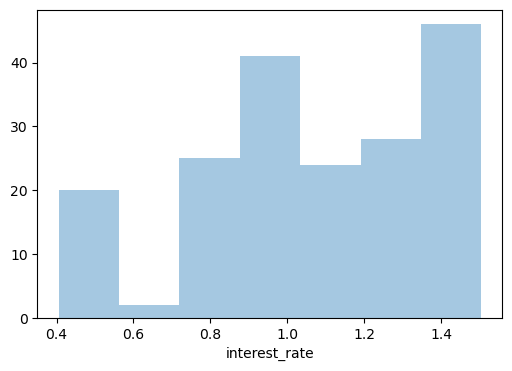

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = df['interest_rate']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='interest_rate', ylabel='Count'>

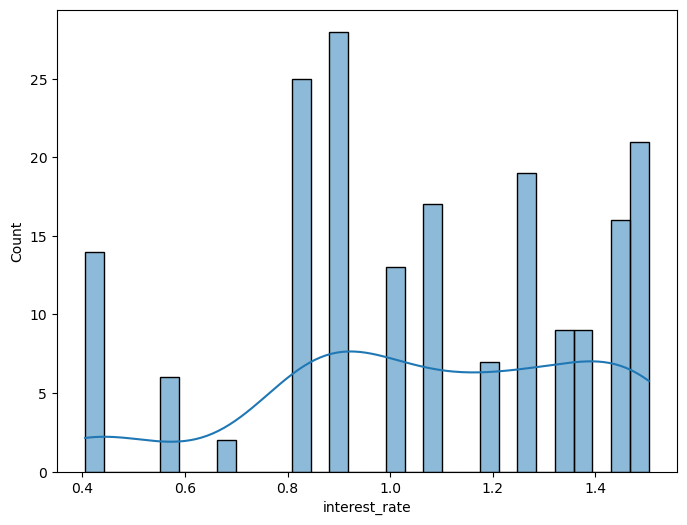

In [65]:
# 타깃값 interest rate의 분포도 확인 : 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.histplot(df['interest_rate'], kde=True, bins=30)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='interest_rate', ylabel='Count'>

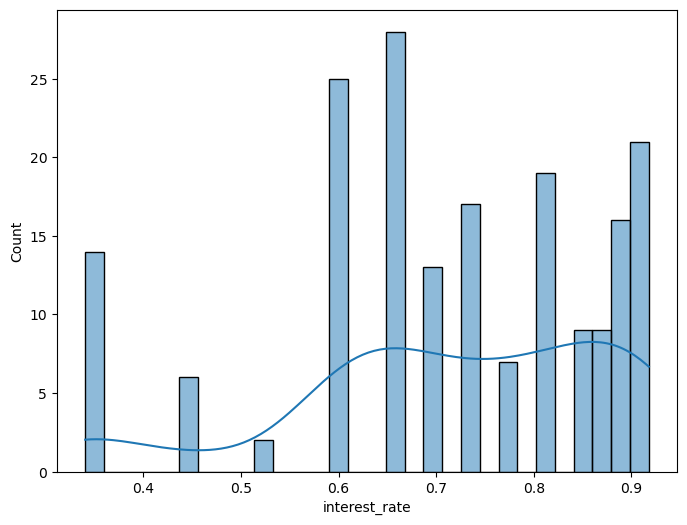

In [69]:
# target값을 로그 변환 후 분포도 확인
import numpy as np

y_train_df = np.log1p(df['interest_rate'])
plt.figure(figsize=(8, 6))
sns.histplot(y_train_df, kde=True, bins=30)
plt.show()

#### 타겟값 로그 변환 후 분포도 확인

C:\Users\avus2\AppData\Local\Temp\ipykernel_17880\3225516248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df,kde=False)


<Axes: xlabel='interest_rate'>

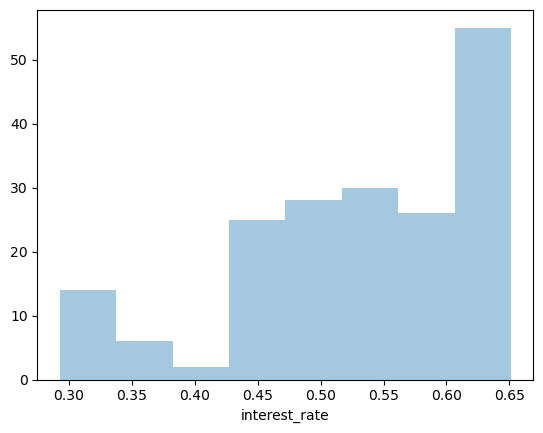

In [45]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)
# 로그 변환 후 비교적 정규 분포에 가까운 형태로 바뀜

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  186 non-null    int64  
 1   unemployment                        186 non-null    float64
 2   coincident                          186 non-null    float64
 3   leading_price                       186 non-null    float64
 4   ESI                                 186 non-null    float64
 5   export_price                        186 non-null    float64
 6   current_account                     186 non-null    float64
 7   GDP                                 186 non-null    float64
 8   land_price_change                   186 non-null    float64
 9   CCSI                                186 non-null    float64
 10  manufacturing_capacity_utilization  186 non-null    float64
 11  us_policy_rate                      186 non-n

In [127]:
df1 = df.loc[:, 'unemployment':'interest_rate']
df1

,unemployment,coincident,leading_price,ESI,export_price,current_account,GDP,land_price_change,CCSI,manufacturing_capacity_utilization,us_policy_rate,kosdaq_index,capital_account,us_industrial_production,us_consumer_sentiment,us_CPI,economic_growth_rate,interest_rate
0,0.274413,-1.906690,-1.302750,-0.448542,1.352840,-1.220150,-1.60339,-0.064170,-2.559780,1.462580,-0.658634,-1.095060,-0.165806,-0.084170,-0.036435,1.393000,0.131284,1.09861
1,0.759790,-2.090250,-1.489570,0.419834,1.187990,-0.000118,-1.47343,0.080638,-0.818807,-0.771720,-0.658634,-0.976000,0.170232,-0.308135,-0.610507,1.393000,0.131284,1.09861
2,0.921583,-1.998470,-1.676400,0.026035,1.710140,0.194846,-1.47343,0.649011,-0.915528,1.781760,-0.658634,-0.911820,-0.192960,-0.233480,-0.708704,1.393000,0.131284,1.09861
3,0.597998,-1.906690,-2.050050,-1.569350,2.625860,-0.472724,-1.47343,0.439039,-2.172900,1.709220,-0.658634,-0.966141,0.024276,-0.532099,-1.229900,-0.435267,-0.304195,1.09861
4,0.597998,-1.906690,-2.517120,-2.710360,2.201230,-0.676970,-1.18173,0.406457,-2.656500,1.491590,-0.658634,-1.086940,-0.087736,-0.457445,-1.441400,-0.435267,-0.304195,1.09861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,-0.372757,0.204256,-0.742268,-0.357666,0.508757,0.360830,1.48521,0.051677,0.245121,-2.048460,2.495740,0.876841,2.183060,0.065140,-0.905097,0.503573,-0.304195,1.50408
182,-0.696342,-0.071085,-0.555441,-0.488932,0.696905,0.498364,1.48521,0.044436,-0.045041,0.055260,2.495740,0.656770,-0.108102,-0.009515,-1.275220,0.503573,-0.304195,1.50408
183,-0.696342,-0.162865,-0.368615,-0.589906,0.769403,-0.889614,1.48521,0.037196,-0.238483,-0.945821,2.195320,0.633330,1.439710,0.289105,-1.146810,0.355335,-0.086456,1.44692
184,-0.696342,-0.713547,-0.088376,-0.650490,0.399147,1.029310,1.83565,0.044436,-0.335204,-0.321959,2.195320,0.504227,5.679210,-0.158825,-1.501830,0.355335,-0.086456,1.38629


In [129]:
# df1의 모든 데이터를 float으로 변환

df1 = df1.astype(float)

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unemployment                        186 non-null    float64
 1   coincident                          186 non-null    float64
 2   leading_price                       186 non-null    float64
 3   ESI                                 186 non-null    float64
 4   export_price                        186 non-null    float64
 5   current_account                     186 non-null    float64
 6   GDP                                 186 non-null    float64
 7   land_price_change                   186 non-null    float64
 8   CCSI                                186 non-null    float64
 9   manufacturing_capacity_utilization  186 non-null    float64
 10  us_policy_rate                      186 non-null    float64
 11  kosdaq_index                        186 non-n

0. unemployment 실업률(단위:%): 실업률은 경제 활동 인구 중에서 일할 능력과 의사가 있지만 일자리를 구하지 못한 사람(실업자)의 비율을 나타내는 경제지표입니다.

1. coincident 경기동행종합지수 : 실제 경기순환과 함께 변동하는 개별지표를 가공·종합하여 만든 지수로 현재 경기상황의 판단에 이용
순환변동치는 매월 계절성 및 불규칙 변동치를 갱신하여 산출하므로 전체 시계열이 매월 수정됨

2. leading_price 경기선행종합지수 : 실제 경기순환에 앞서 변동하는 개별지표를 가공·종합하여 만든 지수로 향후 경기변동의 단기 예측에 이용
순환변동치는 매월 계절성 및 불규칙 변동치를 갱신하여 산출하므로 전체 시계열이 매월 수정됨

3. ESI 경제심리지수 : Economic Sentiment Index. 기업과 소비자 등 모든 민간 경제주체의 경제상황에 대한 심리를 종합적으로 파악하기 위해 BSI와 CSI를 합성한 경제심리지수(ESI : Economic Sentiment Index)를 작성

4. export_price 수출물가 : 수출 및 수입 상품의 가격 변동을 측정하는 통계로 수출 채산성 변동이나 수입원가 부담 파악, 수출입물가지수의 상호 비교를 통한 교역조건 측정 및 실질 GDP 산출을 위한 수출입액 디플레이터로 이용
※ 원화기준 지수로, 계약통화기준 지수는 수출입 상품의 국제적인 수요 및 공급 여건을 반영하는 한편, 원화기준의 경우 추가로 외환시장에서 결정되는 원화환율의 변동을 반영함에 유의 (통계표에서 원화기준, 계약통화기준, 달러기준 물가지수를 확인할 수 있습니다.)

5. current_account 경상수지(단위:백만) : 경상수지는 재화나 서비스를 외국과 사고파는 거래, 즉 경상거래의 결과로 나타나는 수지를 말함

6. GDP 국내총생산(분기) : Gross Domestic Product, 한 나라 안에서 일정 기간 새롭게 생산된 재화와 서비스의 시장가치를 합산한 것. 명목과 실질 국내총생산을 공표함

7. land_price_change 지가변동률(단위:%) : 기준시점 대비 해당시점의 지가지수의 상승분을 나타냄
(유의사항) 전국 지가변동률 통계는 일반적인 지가수준의 변동을 측정하는 하나의 지표로서 특정지역이나 개별토지의 가격수준 및 가격변동을 측정하는 것은 아님

8. CCSI 소비자심리: Composite Consumer Sentiment Index. 소비자동향지수 6개(현재생활형편 등)를 표준하여 합성한 지수로, 경제상황에 대한 종합적인 소비자심리지표임

9. manufacturing_capacity_utilization 제조업가동률(단위:2020=100) : 제조업의 기준시의 가동률 대비 비교시의 가동률 × 100 (계절조정계열) 단기의 경기변동 동향분석 파악에 사용 (전월(기)비 이용) (원계열) 성장수준을 분석하기 위한 경우 사용 (전년동월(기)비 이용)

10. us_policy_rate 미국정책금리(연방기금금리 Federal Fund Rate)

11. kosdaq_index 코스닥지수(단위:1996.7.1 = 100) : Korean Securities Dealers Automated Quotation. 1996년 7월 1일을 100포인트로 설정

12. capital_account 자본수지(단위:백만 달러) : 자산 소유권의 무상이전, 채권자에 의한 채무면제 등을 기록하는 자본이전과 상표권, 영업권 등의 거래를 기록하는 비생산·비금융자산으로 구성

13. us_industrial_production 미국산업생산: 미국 연방준비제도(Federal Reserve)에서 매월 발표하는 지표로, 제조업, 광업, 전기 및 가스 산업의 생산 활동을 측정합니다. 이 지수는 미국 경제의 산업 부문 상태를 파악하고 경제 성장률을 예측하는 데 중요한 역할

14. us_consumer_sentiment 미국(미시간대학교)소비자심리지수: 소비자들의 경제에 대한 신뢰와 전망을 측정하는 지표입니다

15. us_CPI 미국소비자물가지수: 미국 내 소비자들이 구입하는 상품 및 서비스의 가격 변동을 측정하는 경제 지표입니다. **미국 노동통계국(BLS, Bureau of Labor Statistics)**에서 매월 발표하며, 인플레이션을 평가하는 중요한 지표 중 하나입니다

16. economic_growth_rate 경제성장률(분기)(단위:%) : 실질 국내총생산(GDP)의 전기(계절조정) 혹은 전년동기비(원계열) 대비 증감률

#### null 값 일괄 처리

In [133]:
df1.isnull().sum()

unemployment                          0
coincident                            0
leading_price                         0
ESI                                   0
export_price                          0
current_account                       0
GDP                                   0
land_price_change                     0
CCSI                                  0
manufacturing_capacity_utilization    0
us_policy_rate                        0
kosdaq_index                          0
capital_account                       0
us_industrial_production              0
us_consumer_sentiment                 0
us_CPI                                0
economic_growth_rate                  0
interest_rate                         0
dtype: int64

#### 정형데이터의 Feature importance확인

In [135]:
# 원-핫 인코딩 수행 : df1_ohe로 저장 
print('원-핫 인코딩 수행 전 : ', df1.shape)
df1_ohe = pd.get_dummies(df1, dtype=int)
print('원-핫 인코딩 수행 후 : ', df1_ohe.shape)

# 이미 수치형(numerical) 변수만 존재(범주형 변수가 없어서) 인코딩이 적용되지 않음
# get_dummies() 수행후에도 동일한 크기

원-핫 인코딩 수행 전 :  (186, 18)
원-핫 인코딩 수행 후 :  (186, 18)


In [105]:
# Null 값을 가진 피처 확인
null_counts = df1_ohe.isnull().sum()[df1_ohe.isnull().sum()>0]
df1_ohe.dtypes[null_counts.index]
# 확인 결과 없음

Series([], dtype: object)

In [359]:
from sklearn.model_selection import train_test_split

y_target = df1['interest_rate']
X_feature = df1_ohe.drop(['interest_rate'], axis=1, inplace=False)


# 학습/테스트 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_feature ,
                                                       y_target ,
                                                       test_size=0.2, 
                                                       random_state=156)

In [361]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 선형 계열의 회귀 모델 생성 및 학습
# LinearRegression / Ridge / Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

LinearRegression()

Ridge()

Lasso()

In [79]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# 평가 함수 작성

# 학습된 모델을 받아서 예측하고 RMSE 반환

# (1) 단일 모델의 RMSE 값 반환
def get_rmse(model):   # 학습한 모델 전달 받서서
    y_pred = model.predict(X_test)   # 예측 수행하고 평가
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # rmse =  np.sqrt(mse)
    
    print(f"{model.__class__.__name__} RMSE : {rmse:.3f}")
    print(f'R제곱 : {r2_score(y_test, y_pred):.3f}')
    
    return rmse


# (2) 여러 모델의 RMSE 값 반환 : 1번 함수 호출
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model) # 단일 모델의 RMSE 값 반환하는 함수 호출
        rmses.append(rmse)
    
    return rmses

In [143]:
# 평가 함수 호출 / 결과 출력 
get_rmses([lr_reg, ridge, lasso])

LinearRegression RMSE : 0.117
R제곱 : 0.876
Ridge RMSE : 0.117
R제곱 : 0.875
Lasso RMSE : 0.331
R제곱 : -0.000


[0.11652120685479503, 0.1171602579097907, 0.33076398245175415]

In [83]:
# 피처 수가 많으므로 회귀 계수 값의
# 상위 10개, 하위 10개의 피처명과 회귀 계수값을 반환하는 함수 작성
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체 생성 (회귀 계수와 피처명)
    # index는 피처명(컬럼명)
    coef = pd.Series(model.coef_, index=X_feature.columns)
    
    # + 상위 10개, - 하위 10개 회귀 계수 추출하여 반환
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [355]:
# 모델별 회귀 계수 시각화하는 함수
# list 객체로 모델을 입력받아서
# 모델별 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태 출력

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num] )
        plt.show()

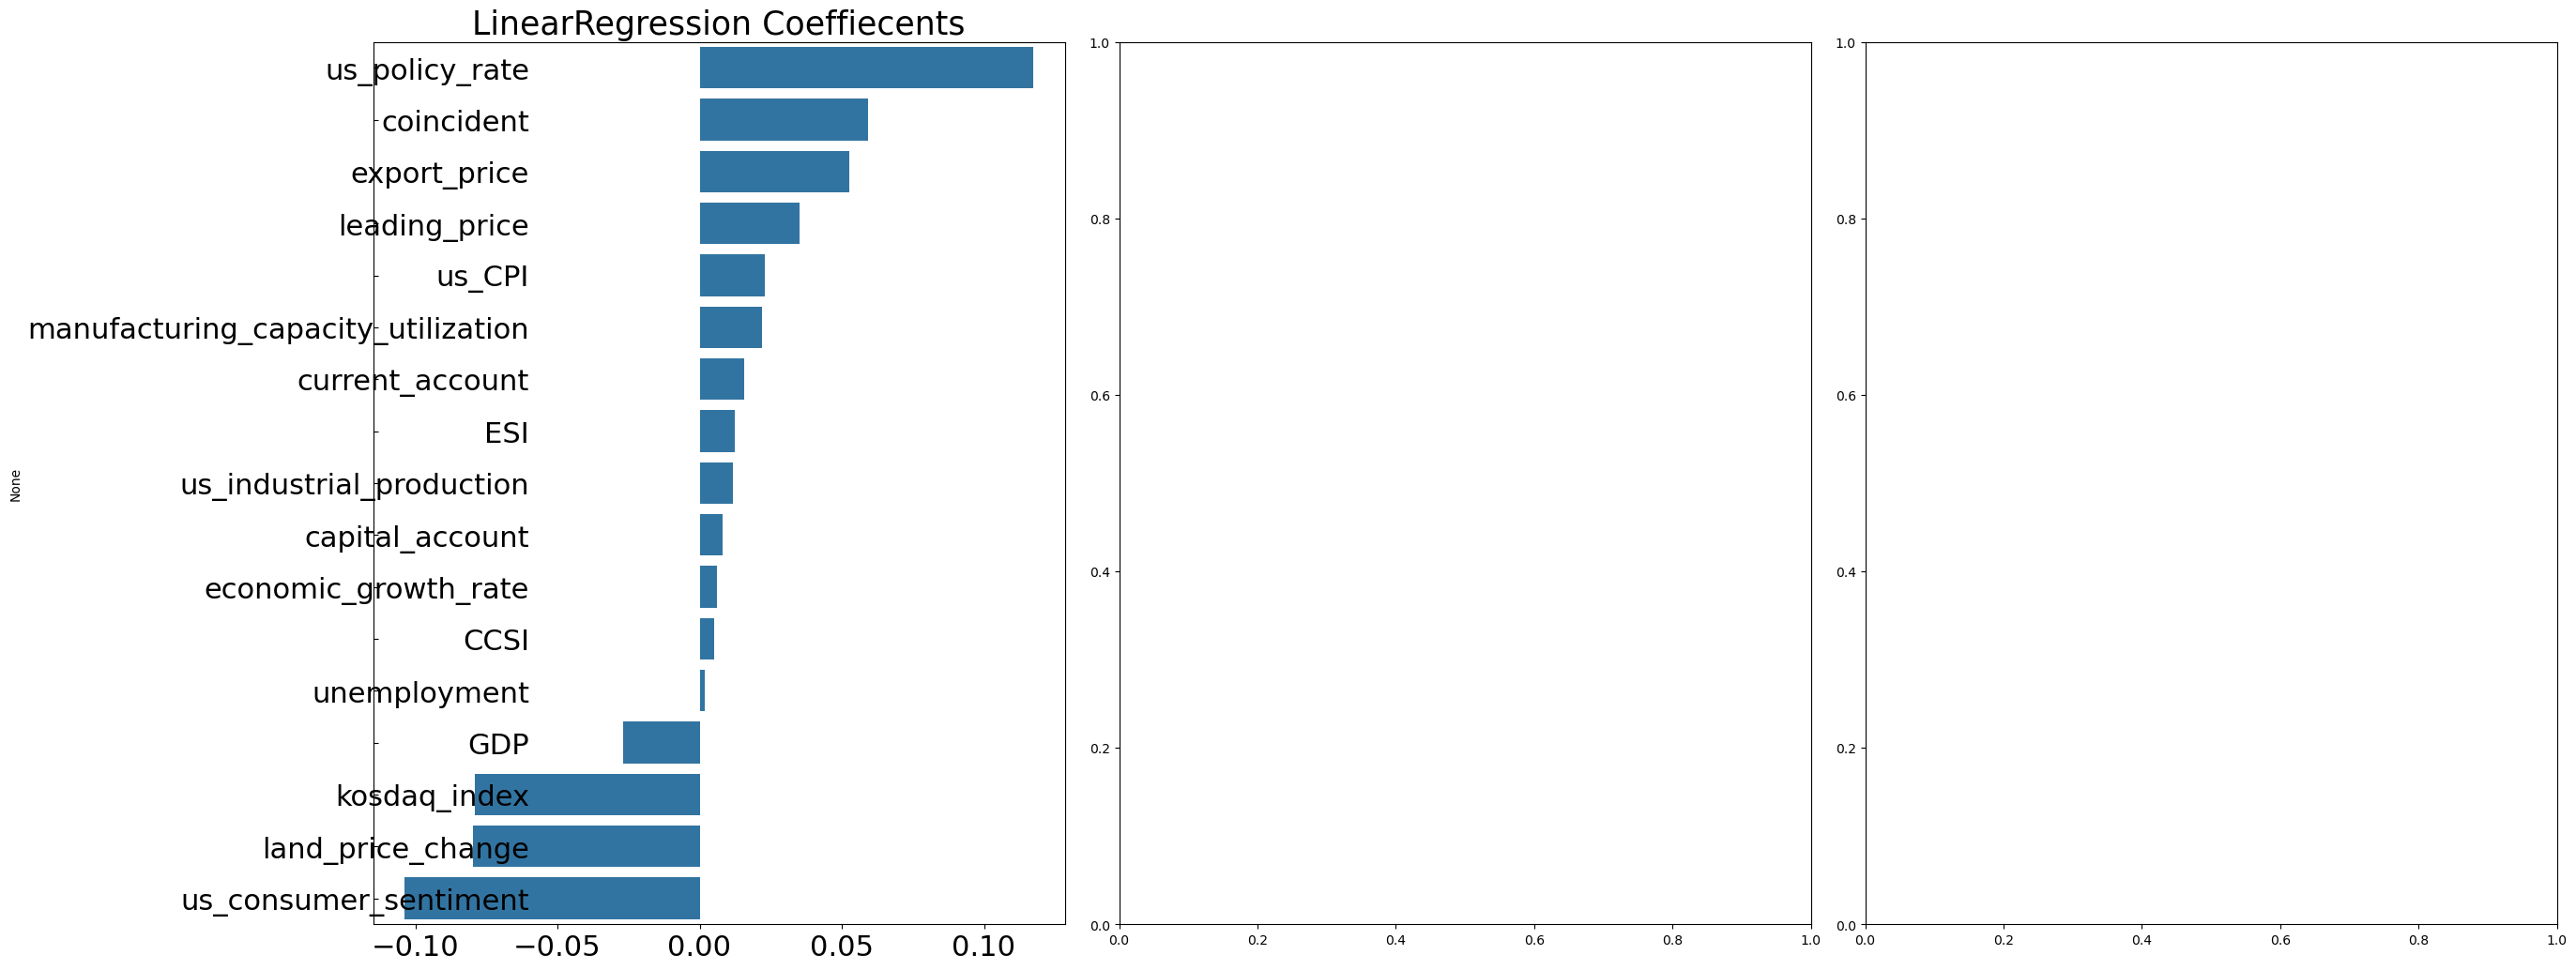

In [363]:
# 시각화 함수 호출 : 모델별 결과 출력 
visualize_coefficient([lr_reg, ridge, lasso])

In [119]:
from sklearn.model_selection import cross_val_score

# 5개 폴드 교차검증으로 모델별 RMSE와 평균 RMSE 출력

# 교차검증 수행하는 함수 작성
def rmse_avvg_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_feature, y_target, 
                                             scoring='neg_mean_squared_error',
                                             cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f"{model.__class__.__name__} 교차검증 RMSE : {rmse_list}")
        print(f"{model.__class__.__name__} 교차검증 평균 RMSE : {rmse_avg:.3f}")

In [147]:
rmse_avvg_cv([lr_reg, ridge, lasso])

LinearRegression 교차검증 RMSE : [0.18896616 0.14443691 0.05648888 0.218447   0.16065368]
LinearRegression 교차검증 평균 RMSE : 0.154
Ridge 교차검증 RMSE : [0.18242964 0.13932371 0.05515383 0.21319579 0.18978759]
Ridge 교차검증 평균 RMSE : 0.156
Lasso 교차검증 RMSE : [0.30613578 0.19760305 0.25981039 0.56428059 0.42441876]
Lasso 교차검증 평균 RMSE : 0.350


In [334]:
from sklearn.model_selection import GridSearchCV

# 튜닝 수행 함수 작성
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error',
                             cv=5)
    grid_model.fit(X_feature, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
     # 최적 평균 RMSE 값 출력 , 최적 alpha 값 
    print(f"{model.__class__.__name__} 최적 평균 RMSE : {rmse:.4f}, 최적 alpha {grid_model.best_params_}")   
    
    return grid_model.best_estimator_

In [336]:
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }

best_ridge = get_best_params(ridge, ridge_params)
best_lasso = get_best_params(lasso, lasso_params)   

Ridge 최적 평균 RMSE : 0.1845, 최적 alpha {'alpha': 5}
Lasso 최적 평균 RMSE : 0.1718, 최적 alpha {'alpha': 0.005}


Ridge(alpha=0.05)

Lasso(alpha=0.001)

LinearRegression RMSE : 0.117
R제곱 : 0.876
Ridge RMSE : 0.117
R제곱 : 0.876
Lasso RMSE : 0.118
R제곱 : 0.874


[0.11652120685479503, 0.11655419984317317, 0.11761023472367027]

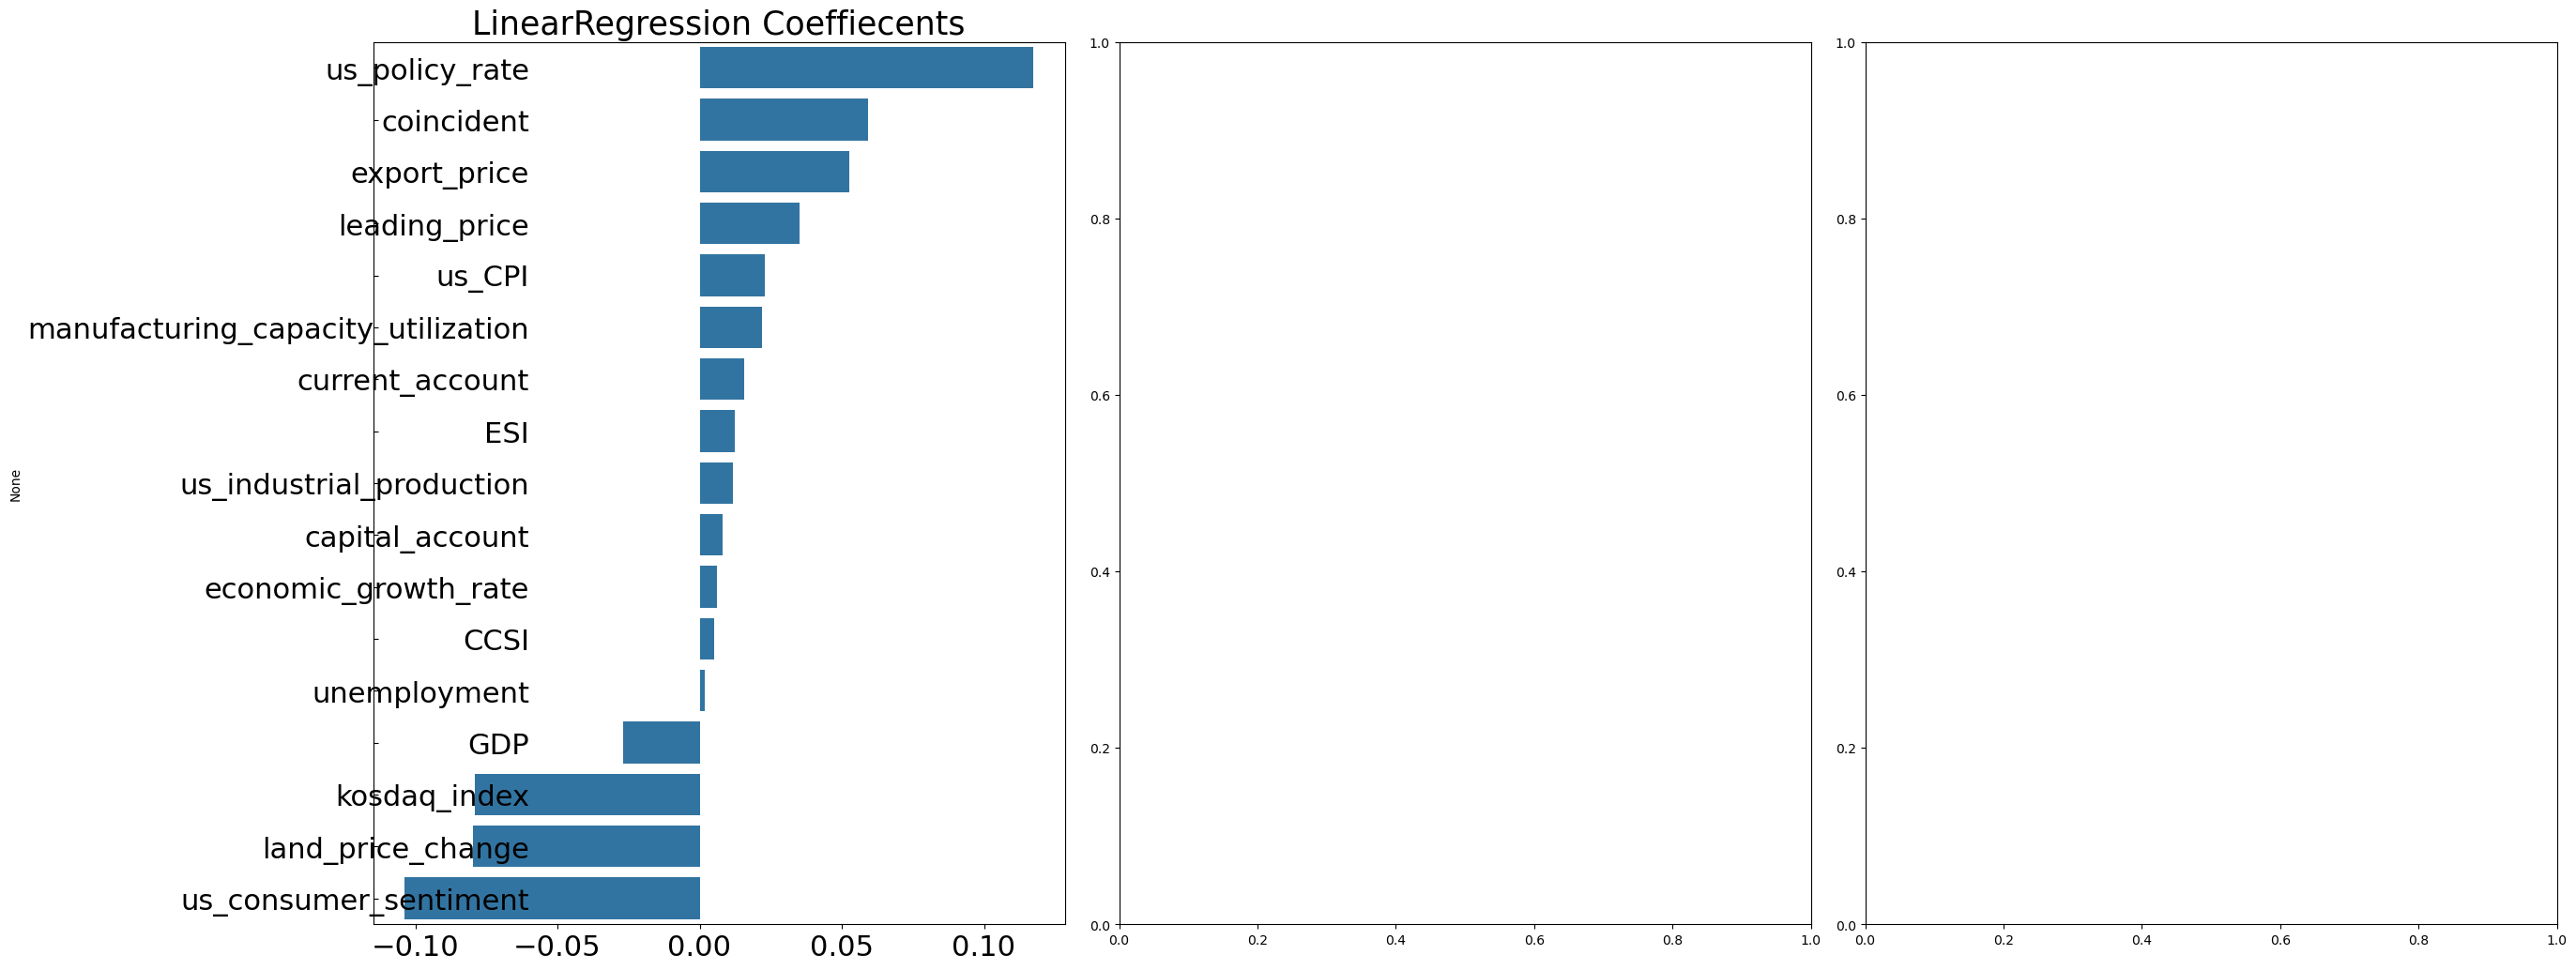

In [149]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
get_rmses([lr_reg, ridge, lasso])

# 모든 모델의 회귀 계수 시각화
visualize_coefficient([lr_reg, ridge, lasso])

In [151]:
# 숫자형 피처들에 대한 데이터 분포 왜곡도 확인 후
# 높은 왜곡도를 나타내는 피처 추출하고
# 왜곡도 값이 1 이상인 경우 높다고 판단 
# 왜곡도 높은 피처들에 대해 로그 변환 적용
# 숫자형 변수의 왜곡도 확인은
# 원-핫 인코딩 적용 전 데이터 df 사용

from scipy.stats import skew

# skew() 적용
# apply lambda로 skew() 호출
skew_features = df1.apply(lambda x : skew(x))

# skew 정도가 1 보다 큰 피처들만 추출
skew_features_top = skew_features[skew_features > 1]
skew_features_top.sort_values(ascending=False)

us_policy_rate    1.551877
us_CPI            1.262449
dtype: float64

In [153]:
skew_features_top.index

Index(['us_policy_rate', 'us_CPI'], dtype='object')

In [159]:
# 왜곡도가 높은 피처들을 로그 변환
# skew 정도가 1이상인 피처들

df1[skew_features_top.index] = np.log1p(df1[skew_features_top.index])
df1[skew_features_top.index]

C:\Anaconda3\envs\NLPenv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,us_policy_rate,us_CPI
0,-1.074800,0.872548
1,-1.074800,0.872548
2,-1.074800,0.872548
3,-1.074800,-0.571402
4,-1.074800,-0.571402
...,...,...
181,1.251545,0.407844
182,1.251545,0.407844
183,1.161687,0.304049
184,1.161687,0.304049


In [163]:
# 로그 변환 후 다시 왜곡 정도 확인
skew_features = df1.apply(lambda x : skew(x))

# skew 정도가 1 보다 큰 피처들만 추출
skew_features_top = skew_features[skew_features > 1]
skew_features_top.sort_values(ascending=False)

Series([], dtype: float64)

In [185]:
# Null 값을 가진 피처 확인
null_counts = df_ohe2.isnull().sum()[df_ohe2.isnull().sum()>0]
null_counts
df_ohe2.dtypes[null_counts.index]

Series([], dtype: int64)

Series([], dtype: object)

In [177]:
# Null 피처들은 평균값으로 대체
df_ohe2.fillna(df_ohe2.mean(numeric_only=True), inplace=True)

In [181]:
# Null 값을 가진 피처 확인
null_counts = df_ohe2.isnull().sum()[df_ohe2.isnull().sum()>0]
df_ohe2.dtypes[null_counts.index]

Series([], dtype: object)

In [187]:
# 원-핫 인코딩 
# df_ohe2 = pd.get_dummies(df1)

# 타깃/피처 데이터 세트 생성
y_target = df_ohe2['interest_rate']
X_feature = df_ohe2.drop('interest_rate', axis=1)

In [189]:
# 학습/테스트용 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_feature ,
                                                       y_target ,
                                                       test_size=0.2, 
                                                       random_state=156)

# 다시 최적 하이퍼 파라미터 튜닝 후 RMSE 출력 
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_ridge = get_best_params(ridge, ridge_params) # GridSearchCV 적용 함수 호출
best_lasso = get_best_params(lasso, lasso_params)    

Ridge 최적 평균 RMSE : 0.1837, 최적 alpha {'alpha': 0.05}
Lasso 최적 평균 RMSE : 0.1875, 최적 alpha {'alpha': 0.001}


Ridge(alpha=0.05)

Lasso(alpha=0.001)

LinearRegression RMSE : 0.134
R제곱 : 0.835
Ridge RMSE : 0.114
R제곱 : 0.881
Lasso RMSE : 0.116
R제곱 : 0.877


[0.1343433534294693, 0.11428811983305495, 0.1158426001118522]

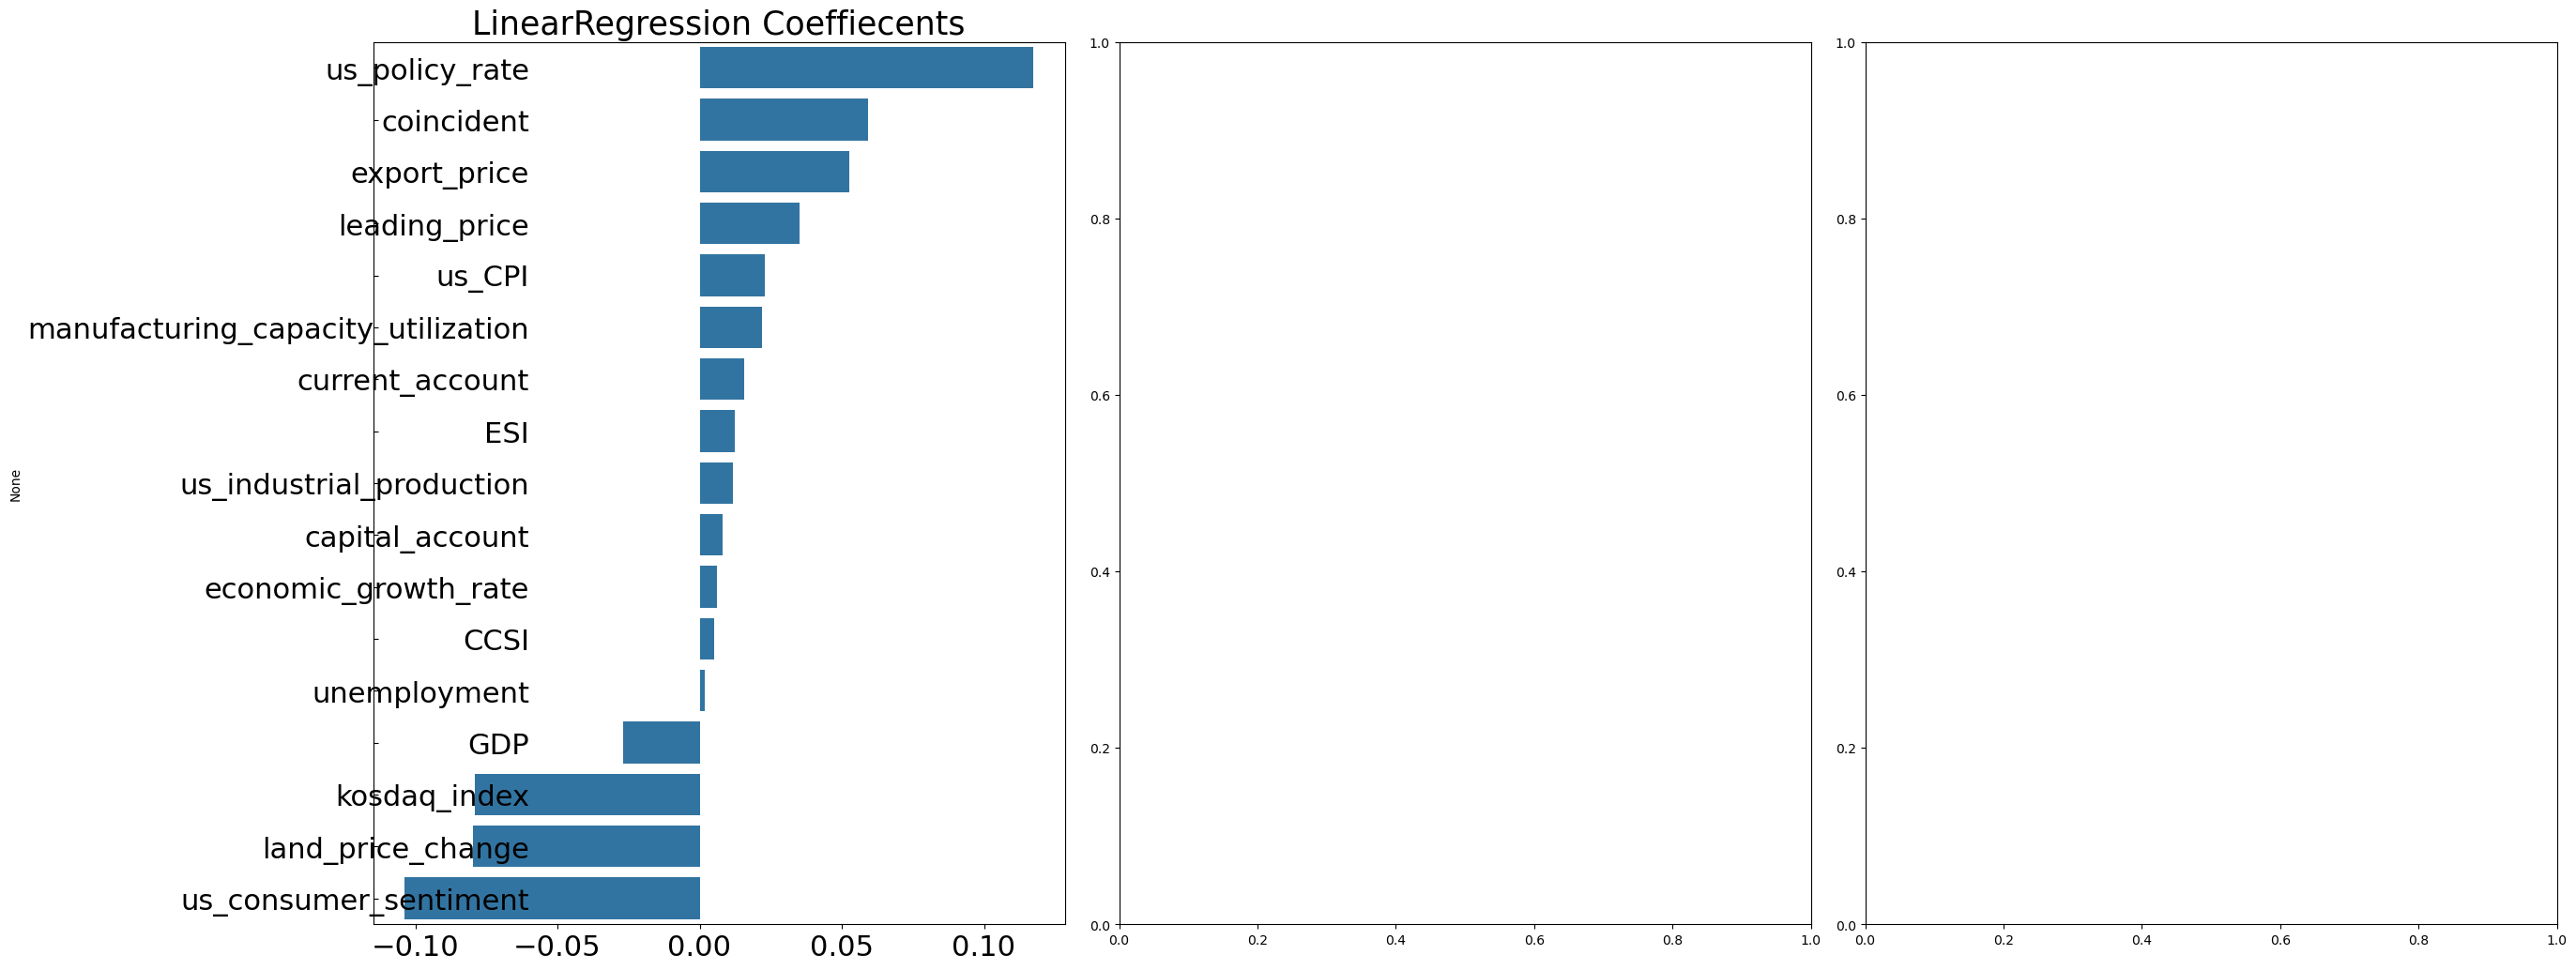

In [191]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
get_rmses([lr_reg, ridge, lasso])

# 모든 모델의 회귀 계수 시각화
visualize_coefficient([lr_reg, ridge, lasso])


Text(0, 0.5, 'interest_rate')

Text(0.5, 0, 'us_policy_rate')

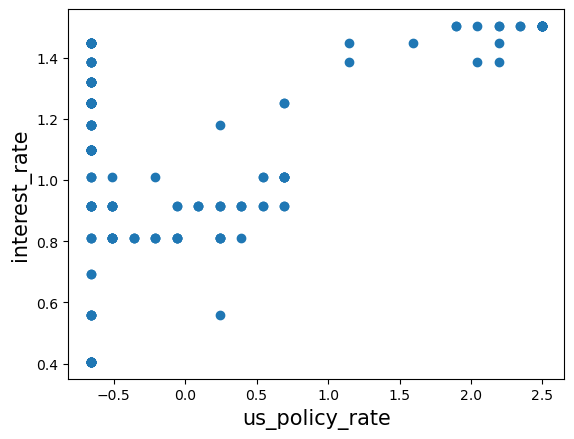

In [195]:
plt.scatter(x=df['us_policy_rate'], y=df['interest_rate'])
plt.ylabel('interest_rate', fontsize=15)
plt.xlabel('us_policy_rate', fontsize=15)
plt.show()

Text(0, 0.5, 'interest_rate')

Text(0.5, 0, 'us_policy_rate')

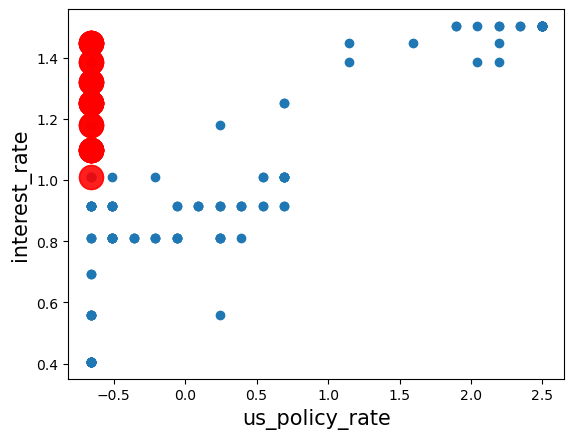

In [209]:
# 그래프에 확인한 이상치 표시
plt.scatter(x=df['us_policy_rate'], y=df['interest_rate'])
plt.ylabel('interest_rate', fontsize=15)
plt.xlabel('us_policy_rate', fontsize=15)

outlier = (df["us_policy_rate"] < -0.6) & (df["interest_rate"] > 1.0)
outlier_df = df[outlier]
plt.scatter(x=outlier_df["us_policy_rate"] , y=outlier_df["interest_rate"], s=300, c="r", alpha=0.5 )

plt.show()

In [211]:
# df_ohe2 (로그변환된 데이터)
# -0.6과 1.0도 로그변환해서 비교
cond1= df_ohe2["us_policy_rate"] < np.log1p(-0.6)
cond2= df_ohe2["interest_rate"] > np.log1p(1.0)
outlier_index = df_ohe2[cond1 & cond2].index

print('이상치 삭제 전 :', df_ohe2.shape)

# 이상치 삭제
df_ohe2.drop(outlier_index, axis=0, inplace=True)

print('이상치 삭제 후 :', df_ohe2.shape)

# 81개 행 삭제됨

이상치 삭제 전 : (186, 18)
이상치 삭제 후 : (105, 18)


In [213]:
# 이상치 제거된 df_ohe2 데이터 사용

# 타깃/피처 데이터 세트 생성
y_target = df_ohe2['interest_rate']
X_feature = df_ohe2.drop('interest_rate', axis=1)

# 학습/테스트용 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_feature ,
                                                       y_target ,
                                                       test_size=0.2, 
                                                       random_state=156)

# 다시 최적 하이퍼 파라미터 튜닝 후 RMSE 출력 
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_ridge = get_best_params(ridge, ridge_params) # GridSearchCV 적용 함수 호출
best_lasso = get_best_params(lasso, lasso_params)    


Ridge 최적 평균 RMSE : 0.1845, 최적 alpha {'alpha': 5}
Lasso 최적 평균 RMSE : 0.1718, 최적 alpha {'alpha': 0.005}


Ridge(alpha=5)

Lasso(alpha=0.005)

LinearRegression RMSE : 0.124
R제곱 : 0.884
Ridge RMSE : 0.086
R제곱 : 0.944
Lasso RMSE : 0.091
R제곱 : 0.937


[0.12374027940583801, 0.08567204970467691, 0.09135233413112827]

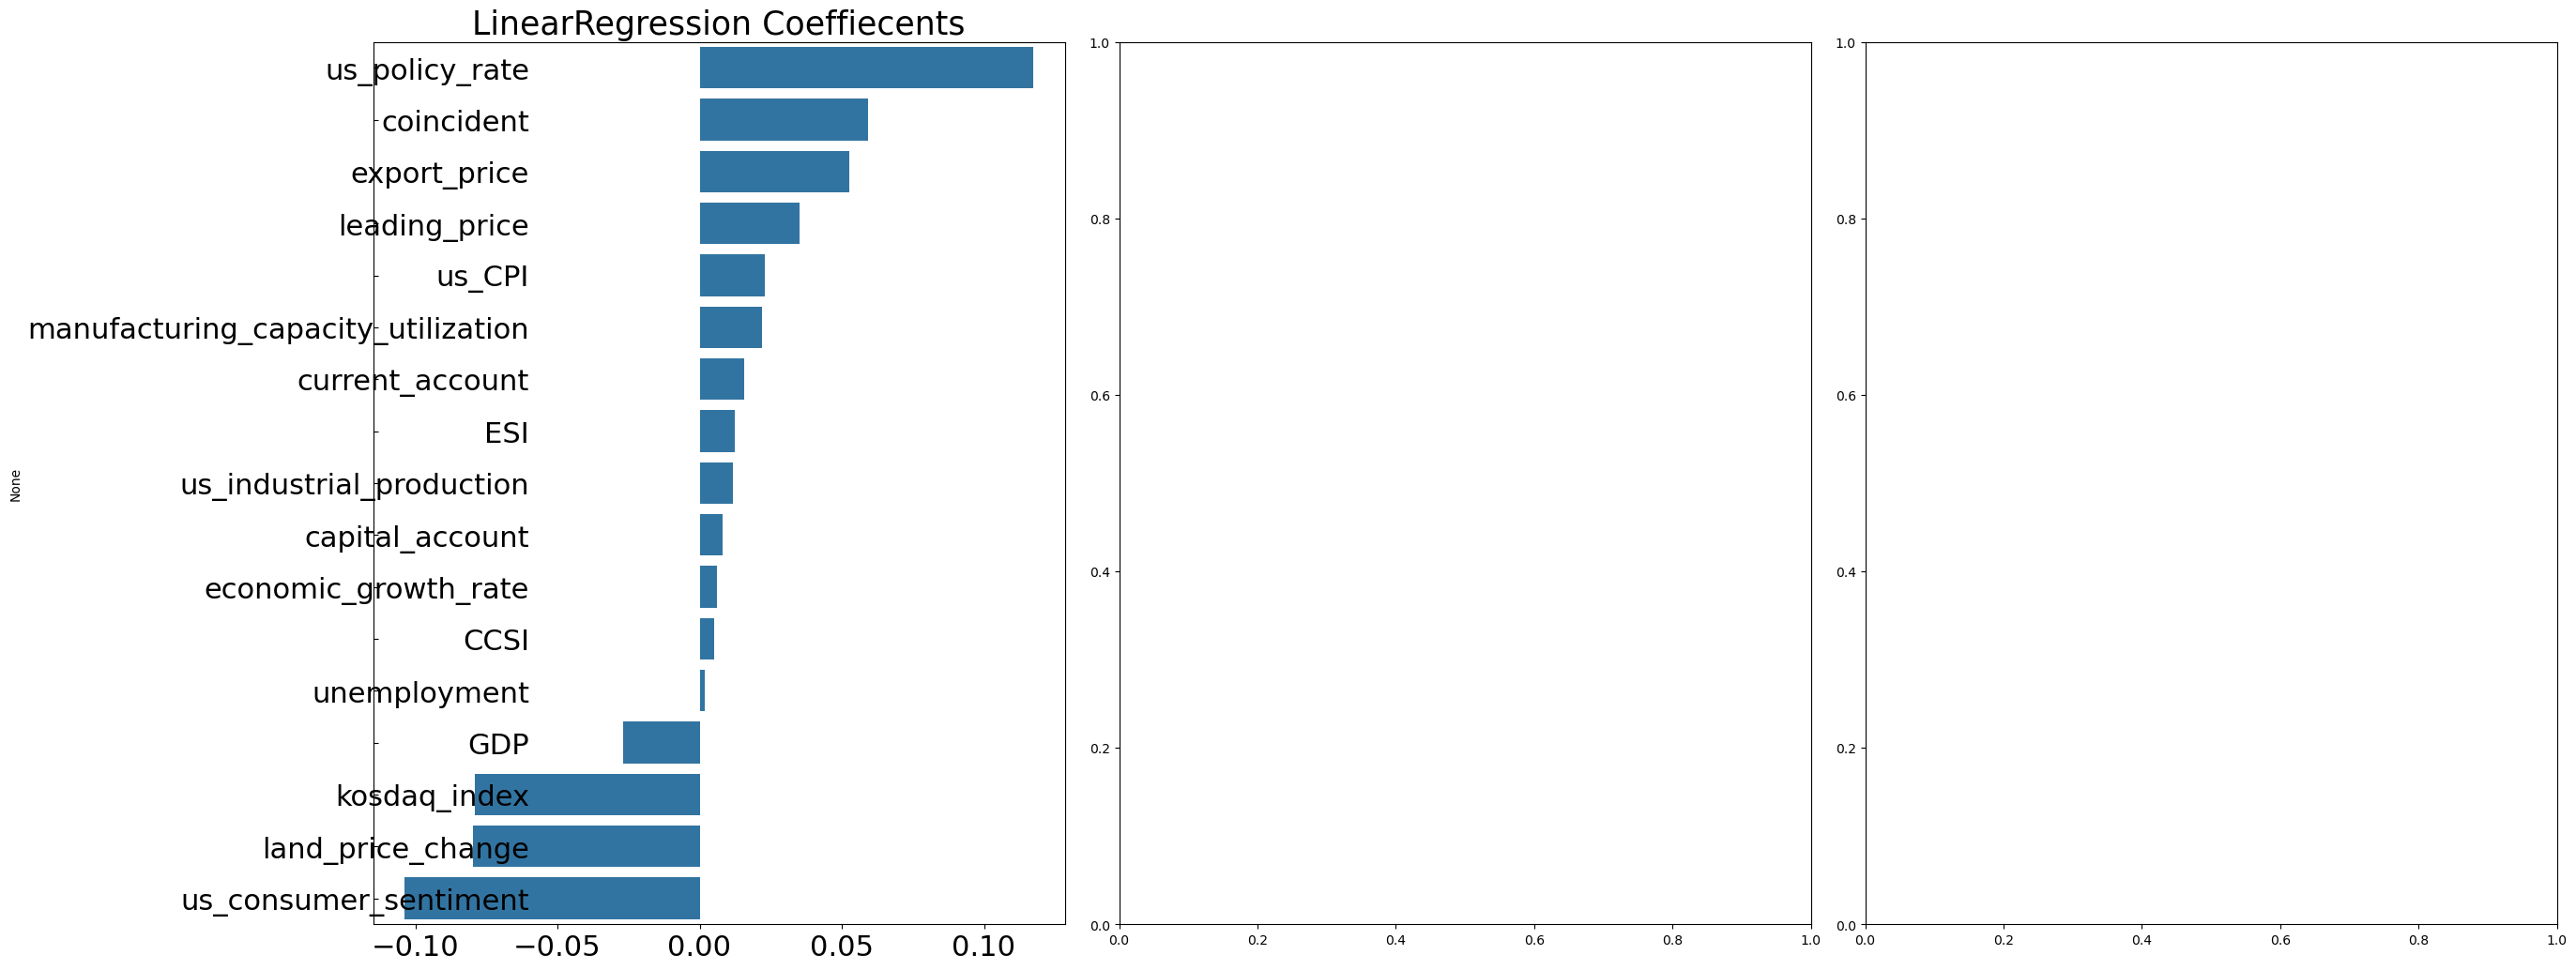

In [215]:
# 최적화 alpha값으로 학습/예측/평가 수행
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
get_rmses([lr_reg, ridge, lasso])

# 모든 모델의 회귀 계수 시각화
visualize_coefficient([lr_reg, ridge, lasso])

In [246]:
# RMSLE 구하는 함수
def rmsle(y, y_pred):    
    # 로그 변환된 실제값과 예측값의 차이를 제곱해서 평균한 것에 루트 씌움 
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

# 로그 변환된 값을 원래 값으로 변환 후 RMSLE 값 반환 
def evaluate_org_interest_rate(y_test , preds):     
    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요. 
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result


In [252]:
# 데이터 세트 분리, 모델 학습/예측 작업을 함수로 작성

from sklearn.model_selection import train_test_split
import gc 
from  scipy.sparse import hstack

def model_train_predict(model):

    X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X_train, X_test, y_train
    gc.collect() # garbage collector
    
    return preds, y_test

In [254]:
# LightGBM 회귀 트리 적용
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' :[200]}

lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=156
)

best_lgbm = get_best_params(lgbm_model, lgbm_params)

lgbm_preds, y_test = model_train_predict(model = lgbm_model)
print('LightGBM (정형데이터 only) RMSLE:',  evaluate_org_interest_rate(y_test , lgbm_preds))

# LightGBM (정형데이터 only) RMSLE: 0.0705511054462625

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 17
[LightGBM] [Info] Start training from score 0.998003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 17
[LightGBM] [Info] Start training from score 0.965850
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [266]:
print('LightGBM (정형데이터 only) RMSLE:',  evaluate_org_interest_rate(y_test , lgbm_preds))

LightGBM (정형데이터 only) RMSLE: 0.0705511054462625


In [268]:
# 비정형데이터(보고서)가 포함되지 않은 경우 예측
from sklearn.linear_model import Ridge 

# 모델 생성
ridge_model = Ridge(solver = "lsqr", fit_intercept=False)

# 예측
linear_preds , y_test = model_train_predict(model=ridge_model)
print('Ridge (정형데이터 only) RMSLE::', evaluate_org_interest_rate(y_test , linear_preds))

# Ridge (정형데이터 only) RMSLE:: 0.3893808921482098

Ridge (정형데이터 only) RMSLE:: 0.3893808921482098


In [270]:
from sklearn.linear_model import Lasso 

lasso_model = Lasso(fit_intercept=False)

linear_preds , y_test = model_train_predict(model=lasso_model)
print('Lasso (정형데이터 only) RMSLE::', evaluate_org_interest_rate(y_test , linear_preds))

# Lasso (정형데이터 only) RMSLE:: 1.08745436652051

Lasso (정형데이터 only) RMSLE:: 1.08745436652051


Feature importance values length: 17
Numerical columns length: 17


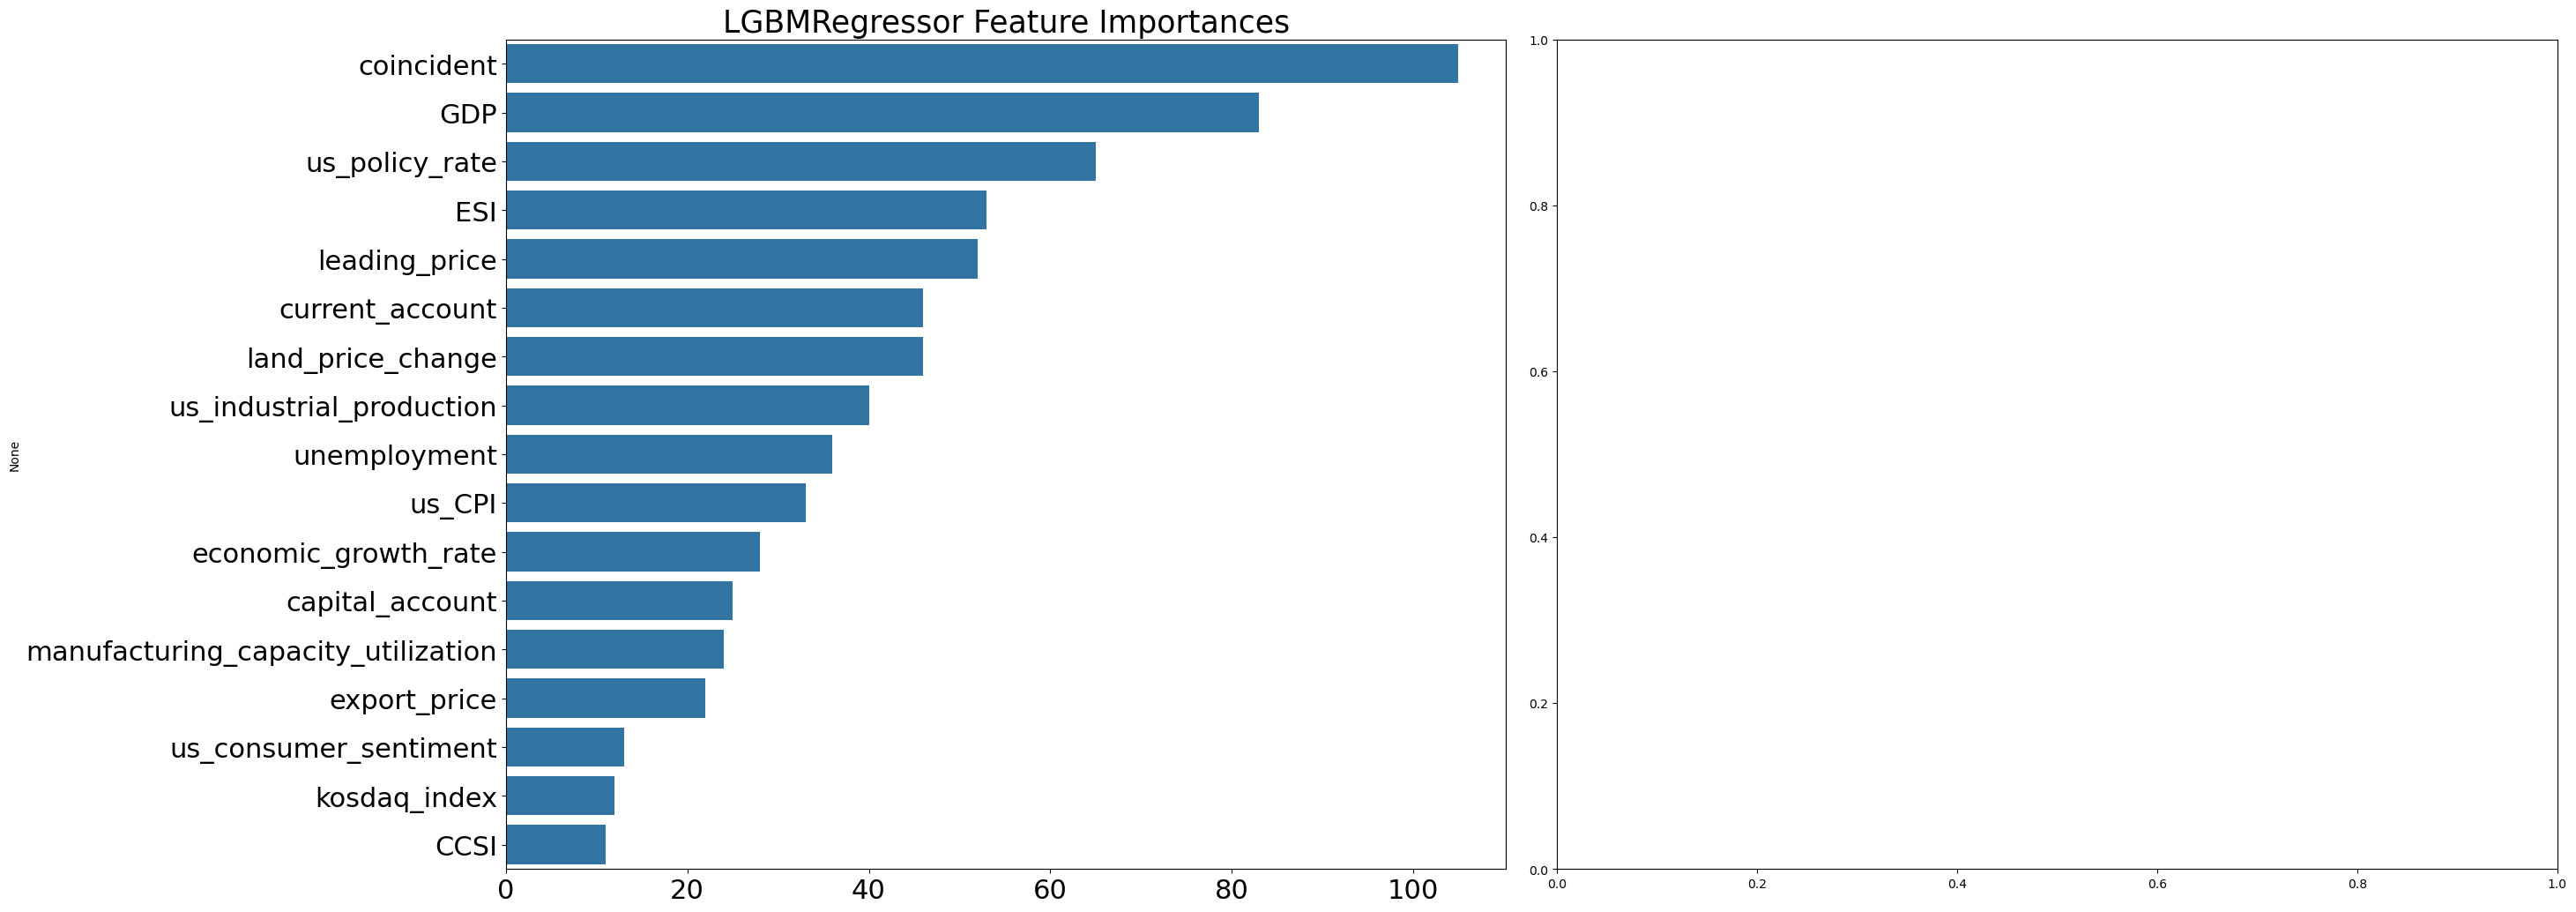

In [221]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_

    print(f"Feature importance values length: {len(ftr_importances_values)}")
    print(f"Numerical columns length: {len(X_feature.columns)}")
    
    ftr_importances = pd.Series(ftr_importances_values, index=X_feature.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])
        plt.show()
        
visualize_ftr_importances([best_lgbm])

Feature importance values length: 17
Numerical columns length: 17


C:\Users\avus2\AppData\Local\Temp\ipykernel_17880\1082190257.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20.values, y=ftr_top20.index, ax=ax, palette='viridis')


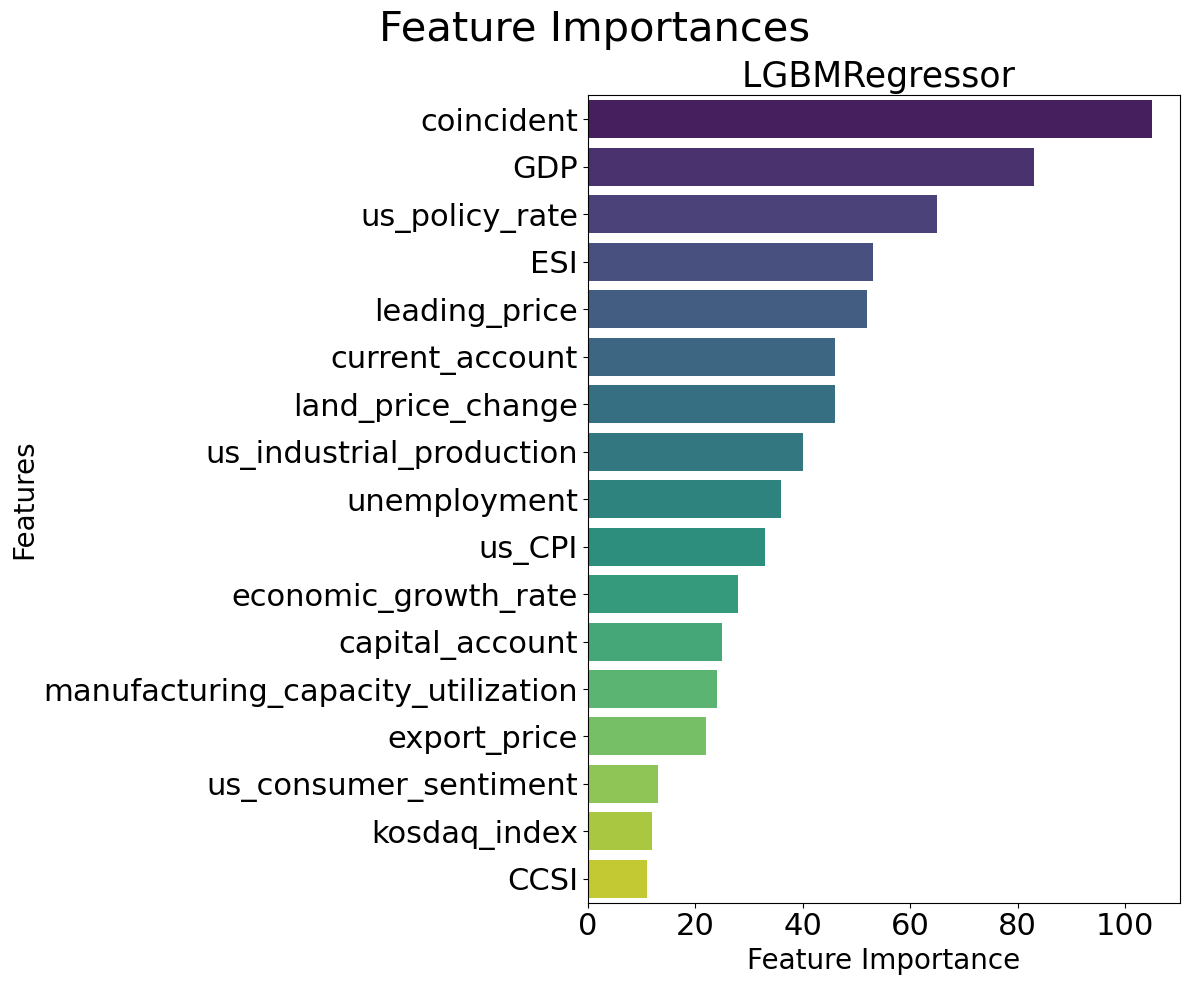

In [243]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    
    ftr_importances_values = model.feature_importances_

    print(f"Feature importance values length: {len(ftr_importances_values)}")
    print(f"Numerical columns length: {len(X_feature.columns)}")
    
    ftr_importances = pd.Series(ftr_importances_values, index=X_feature.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models, feature_mapping=None):

    fig, ax = plt.subplots(figsize=(12, 10))
    fig.suptitle('Feature Importances', fontsize=30)
    fig.tight_layout(pad=3.0)  # 서브플롯 간 여백 추가

    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출

        ftr_top20 = get_top_features(model)

        # 서브플롯 타이틀 설정
        ax.set_title(f'{model.__class__.__name__} ', size=25)

        # 폰트 크기 조정
        ax.tick_params(axis='both', which='major', labelsize=22)

        # seaborn barplot 생성
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index, ax=ax, palette='viridis')

        # x, y 라벨 설정
        ax.set_xlabel('Feature Importance', fontsize=20)
        ax.set_ylabel('Features', fontsize=20)

    # 레이아웃 최종 조정 및 그래프 출력
    plt.tight_layout()
    plt.show()

visualize_ftr_importances([best_lgbm])

0. unemployment 실업률(단위:%): 실업률은 경제 활동 인구 중에서 일할 능력과 의사가 있지만 일자리를 구하지 못한 사람(실업자)의 비율을 나타내는 경제지표입니다.

1. coincident 경기동행종합지수 : 실제 경기순환과 함께 변동하는 개별지표를 가공·종합하여 만든 지수로 현재 경기상황의 판단에 이용
순환변동치는 매월 계절성 및 불규칙 변동치를 갱신하여 산출하므로 전체 시계열이 매월 수정됨

2. leading_price 경기선행종합지수 : 실제 경기순환에 앞서 변동하는 개별지표를 가공·종합하여 만든 지수로 향후 경기변동의 단기 예측에 이용
순환변동치는 매월 계절성 및 불규칙 변동치를 갱신하여 산출하므로 전체 시계열이 매월 수정됨

3. ESI 경제심리지수 : Economic Sentiment Index. 기업과 소비자 등 모든 민간 경제주체의 경제상황에 대한 심리를 종합적으로 파악하기 위해 BSI와 CSI를 합성한 경제심리지수(ESI : Economic Sentiment Index)를 작성

4. export_price 수출물가 : 수출 및 수입 상품의 가격 변동을 측정하는 통계로 수출 채산성 변동이나 수입원가 부담 파악, 수출입물가지수의 상호 비교를 통한 교역조건 측정 및 실질 GDP 산출을 위한 수출입액 디플레이터로 이용
※ 원화기준 지수로, 계약통화기준 지수는 수출입 상품의 국제적인 수요 및 공급 여건을 반영하는 한편, 원화기준의 경우 추가로 외환시장에서 결정되는 원화환율의 변동을 반영함에 유의 (통계표에서 원화기준, 계약통화기준, 달러기준 물가지수를 확인할 수 있습니다.)

5. current_account 경상수지(단위:백만) : 경상수지는 재화나 서비스를 외국과 사고파는 거래, 즉 경상거래의 결과로 나타나는 수지를 말함

6. GDP 국내총생산(분기) : Gross Domestic Product, 한 나라 안에서 일정 기간 새롭게 생산된 재화와 서비스의 시장가치를 합산한 것. 명목과 실질 국내총생산을 공표함

7. land_price_change 지가변동률(단위:%) : 기준시점 대비 해당시점의 지가지수의 상승분을 나타냄
(유의사항) 전국 지가변동률 통계는 일반적인 지가수준의 변동을 측정하는 하나의 지표로서 특정지역이나 개별토지의 가격수준 및 가격변동을 측정하는 것은 아님

8. CCSI 소비자심리: Composite Consumer Sentiment Index. 소비자동향지수 6개(현재생활형편 등)를 표준하여 합성한 지수로, 경제상황에 대한 종합적인 소비자심리지표임

9. manufacturing_capacity_utilization 제조업가동률(단위:2020=100) : 제조업의 기준시의 가동률 대비 비교시의 가동률 × 100 (계절조정계열) 단기의 경기변동 동향분석 파악에 사용 (전월(기)비 이용) (원계열) 성장수준을 분석하기 위한 경우 사용 (전년동월(기)비 이용)

10. us_policy_rate 미국정책금리(연방기금금리 Federal Fund Rate)

11. kosdaq_index 코스닥지수(단위:1996.7.1 = 100) : Korean Securities Dealers Automated Quotation. 1996년 7월 1일을 100포인트로 설정

12. capital_account 자본수지(단위:백만 달러) : 자산 소유권의 무상이전, 채권자에 의한 채무면제 등을 기록하는 자본이전과 상표권, 영업권 등의 거래를 기록하는 비생산·비금융자산으로 구성

13. us_industrial_production 미국산업생산: 미국 연방준비제도(Federal Reserve)에서 매월 발표하는 지표로, 제조업, 광업, 전기 및 가스 산업의 생산 활동을 측정합니다. 이 지수는 미국 경제의 산업 부문 상태를 파악하고 경제 성장률을 예측하는 데 중요한 역할

14. us_consumer_sentiment 미국(미시간대학교)소비자심리지수: 소비자들의 경제에 대한 신뢰와 전망을 측정하는 지표입니다

15. us_CPI 미국소비자물가지수: 미국 내 소비자들이 구입하는 상품 및 서비스의 가격 변동을 측정하는 경제 지표입니다. **미국 노동통계국(BLS, Bureau of Labor Statistics)**에서 매월 발표하며, 인플레이션을 평가하는 중요한 지표 중 하나입니다

16. economic_growth_rate 경제성장률(분기)(단위:%) : 실질 국내총생산(GDP)의 전기(계절조정) 혹은 전년동기비(원계열) 대비 증감률

#### 피처 인코딩 및 피처 벡터화 

- 인코딩 또는 벡터화 수행할 컬럼 선별
- 예측 모델은 금리를 예측해야 하므로 회귀 모델 기반
  - 선형 회귀 모델과 회귀 트리 모델 적용할 예정
  - 선형 회귀의 경우 원-핫 인코딩이 훨신 선호되므로 인코딩할 피처는 모두 원-핫 인코딩 적용
- 피처 벡터화 경우
  - 비교적 짧은 텍스트는 Count 기반 벡터화
  - 긴 텍스트는 TF-IDF 벡터화 수행 

#### 각 칼럼 검토하고 적용

In [274]:
import pandas as pd

final_df= pd.read_csv('./data/lagged_data_2.csv')
print(final_df.shape)
final_df[:204]

(186, 22)


,datetime,unemployment,coincident,leading_price,ESI,export_price,current_account,GDP,land_price_change,CCSI,...,kosdaq_index,capital_account,us_industrial_production,us_consumer_sentiment,us_CPI,economic_growth_rate,interest_rate,summary,news_title,news_sentiment
0,09-Jul,0.274413,-1.906690,-1.302750,-0.448542,1.352840,-1.220150,-1.60339,-0.064170,-2.559780,...,-1.095060,-0.165806,-0.084170,-0.036435,1.393000,0.131284,1.09861,통화정책방향 까지 한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 부동산시장은 소폭의 상승세가 지속되었음 통화정책은 당분간 완화기조를 유지하는 데 주 안점을 두고 운용해 나갈 것임,"[경제 ABC] 소득의 명목가치와 실질가치 OECD ""한국, 경기부양에 가장 적극적"" ""車 세금 감면 2분기 GDP 0.5%P 견인"" 한은 하반기 경제전망치 상향조정폭 관심 2008년 주요국 명목 GDP 순위 韓경제 세계 15위..5년새 4단계 추락 40대 여성 경제활동 ‘최고’ 한국 GDP순위 갈수록 뒷걸음… 호(濠)에 뒤져 15위 - 조선비즈 한국경제 세계15위로 ‘뒷걸음질’ 런던 물가 3위서 16위로…도쿄ㆍ오사카ㆍ홍콩 상위권 주택담보인정비율 60%서 50%로 축소 [사설] 부활한 부동산투기, 더 강력하게 대처해야 1인당 GDP 추락…혹독한 환율 효과 “한국 남녀임금 격차, OECD 나라중 가장 커” 수출입물가 석달만에 동반 상승 6월 수출입물가 다시 상승 ""中 2분기 GDP 성장률 7.9%"" 러시아 GDP성장률 90년대이후 최악 잠재성장률 어떻게 계산하나? 한국 고용률 하위권…低실업국 무색 스웨덴의 복지국가에 관한 오해 [기로에 선 신자유주의]고용기적이룬 네덜란드식 유연안정성 모델",1.227273
1,09-Aug,0.759790,-2.090250,-1.489570,0.419834,1.187990,-0.000118,-1.47343,0.080638,-0.818807,...,-0.976000,0.170232,-0.308135,-0.610507,1.393000,0.131284,1.09861,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 부동산가격은 계속 상승세가 지속되었음 통화정책은 당분간 완화기조를 유지해 나갈 것임 경기 및,"‘GDP 세계 8위’ 美 캘리포니아주 왜 몰락하나 [사설] 늦기 전에 부동산 규제책 더 강화해야 보좌관 석방 요구하는 이정희 의원 유럽증시 美실업률 소식에 이틀째 상승 집값 2006년 수준 육박… ‘돈줄’ 더 죈다 [사설] 윤증현 장관의 잘못된 부동산 인식 [사설] 주택시장 규제 어느 장단에 맞춰야 하나 [심층분석] 실업률 대신 고용률을 '고용시장 대표지표'로 삼아야 中 GDP 통계 `무원칙' 인정 中건국 60년..6대 지표로 본 경제발전상 황태자 김지석, 이창호를 넘다! 국제신문 서울 7월 실업률 4.8% 전국 최고 日 사상최악 실업률 굵직한 지표 줄줄이 발표… 美고용·韓 물가 주목 日 실업률, 정권 교체 원해",1.312500
2,09-Sep,0.921583,-1.998470,-1.676400,0.026035,1.710140,0.194846,-1.47343,0.649011,-0.915528,...,-0.911820,-0.192960,-0.233480,-0.708704,1.393000,0.131284,1.09861,금융통화위원회는까지 한국은행 기준금리를 현 수준에서 유지 하여 통화정책을 운용하기로 하 부동산가격은 오름세를 지속하였음 금융시장에서 주택담보대출이 큰 폭의 증가 통화정책은 당분간 금융완화기조를 유지해 나갈 것임 앞으로 통화,"“물가도 못잡나” 말했다가 징역5년 “규제풀 때는 언제고… 또” 부동산시장 혼란 실질 국민총소득 증가율 21년만에 최고 ‘통계착시’ 따른 깜짝성장… 안심은 일러 기생충 '연가시', 곤충들 물가로 투신자살 '유도' [사설] DTI 규제만으로 집값 잡을 수 있을까 교육비 부담률ㆍ대학 등록금 세계 최고 국내 대학 등록금 일본 제치고 OECD '2위' 식료품 소비자 물가 상승률 [크로스미디어] '잃어버린 10년(1990년대 장기 불황)' 때보다 더 춥다 전기.수도 원가정보 내년부터 공개(종합) MB, 남대문시장 구름 인파에…입이 벌어지다 인천에 1만5천여가구 10월까지 공급 기준금리 2%… 7개월째 제자리(상보) 휘트니 한마디에 골드만삭스 `연중최고` - 조선비즈 실질금리 마이너스 시대 졸업…7월 0.9% 부평산곡 푸르지오 견본주택 이틀만에 1만명 울산시 추석물가 집중단속 추석 장바구니 물가 '들썩'..충남도, 대책 추진 [사설] 위기 부르는 금융감독 사각지대 아직 많다 아자이 카푸르,""극단의 강세장..움직일 때"" 여성 경제활동참가율 OECD 최하위권 통합한국 2050년 日ㆍ獨ㆍ佛 추월 ""통일한국 GDP 2050년 美제외 G7 웃돌 것""(종합) “통일한국, ...",1.125000
3,09-Oct,0.597998,-1.906690,-2.050050,-1.569350,2.625860,-0.472724,-1.47343,0.439039,-2.172900,...,-0.966141,0.024276,-0.532099,-1.229900,-0.435267,-0.304195,1.09861,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 통화정책은 당분간 완화기조를 유지해 나갈 것임 금융시장에서는 부동산가격,"한국 실업률 -고용률 격차 OECD 회원국 중 가장 커 미(美)가 평가하는 중(中) 경제… 성장 용틀임 계속할까 재정부 ""4분기 물가 2%대 안정 예상"" 수성구 미분양 아파트 상담 늘었다 DTI규제 한달, 주택대출 '풍선효과' 뚜렷 [부동산따라잡기] 강남 재건축아파트 거래 올스톱 [Asia오전]호주 고용시장 호재…상승 [문답풀이]""DTI 규제 확대, 9일 하루 비었다"" [경제교과서 친구만들기] (32) 필립스곡선 2050년 1인당 GDP 세계 2위, 한국 하기에 달렸다 ""내년 한국 경제성장률 4% 안팎… 선진국은 '더블 딥' 가능성"" 광주.전남 9월 고용시장 '훈풍' ""대구 실업률 16개 시.도 가운데 최고"" ""한.EU FTA, 한.미 FTA 버금가는 효과"" ""환율 10%오르면 소비자물가 0.8%P↑"" ""집값 올랐어요?"" 전화통 터지는 '은마'복덕방 한달새 서울재건축 1445억원 '증발' 인천지역 실업자 1년새 25% 늘었다 청약 열풍속 ‘고분양가’ 주의보! 투자 내년에 시작..그러나 약하다 숫자로 들여다본 여행② 빅맥 지수 장애인 고용 안하는 이유 '근무중 안전 우려' GDP대비 설비투자 사상 최악 '강한 회복' 中, 통화정책 조정 나서나? 중국 :...",1.085714
4,09-Nov,0.597998,-1.906690,-2.517120,-2.710360,2.201230,-0.676970,-1.18173,0.406457,-2.656500,...,-1.086940,-0.087736,-0.457445,-1.441400,-0.435267,-0.304195,1.09861,한국은행 기준금리를 현 수준에서 유지하기로 하였음 붙임 참조 통화정책방향 통화정책은 당분간 완화기조를 유지해 나갈 것임 부동산시장에서는 금융시장,"[아하! 경제뉴스]정부, 국민행복지수 왜 만드나요 도내 미분양 주택 2006년 이후 최저 마침내 10% 돌파한 美 실업률, 고삐풀렸나? 美 26년만에 실업률 10% 돌파(종합) [개장전]이제는 美증시와 커플링될까 '랜드마크' 주상복합아파트가 몰려온다 한은 ""부동산값 오름세.주택대출 주춤"" DTI 확대 2개월, '무풍지대' 어디? 간질환자, 일반인보다 미혼률 2.6배 높아 덴마크 ‘해고 자유’ 있지만 실업급여 최대 4년 2010~2012 물가목표 3±1.0%로 가닥(종합2보) 한은 ""2010~2012년 물가목표는 3±1.0%P"" Cityl

In [276]:
# 비정형 데이터 (보고서)
print('비정형 데이터(보고서요약)의 유형 건수 :', final_df['summary'].nunique())
print('비정형 데이터 sample 5건 : \n', final_df['summary'].value_counts()[10:15])

# 인코딩 변환 적용 결정 
# 종류가 154건으로 원-핫 인코딩으로 변환가능 
# 지금 예제의 ML 모델 구축상 큰 문제는 없음

비정형 데이터(보고서요약)의 유형 건수 : 154
비정형 데이터 sample 5건 : 
 summary
통화정책방향 세계경제는 성장세가 다소 완만해지는 움직임을 지속하였다 전월의 변동성 축소 흐름이 이어졌다 미중 무역협상 진전에 대한 기대가 높아지면서 앞으로 세계경제와 브렉시트 관련 불확실성 등에 영향받을 것으로 고용 상황은 취업자 수 증가규모가 소폭에 그치는 등 부진한 모습을 보였다 앞으로 국내경 제의 성장흐름은 지난 월 전망경로와 대체로 부합할 것으로 예상된다 하반기로 가면서 점차 회복될 것으로 예상된다 소비자물가는 대 후반으로 둔화되었다 월 일반인 기대인플레이션율 는 수준을 소비자물가 상승률 전망경로 앞으로 근원인플레이션율도 완만하게 상승할 것으로 보인다 금융시장은 안정된 모습을 보였다 장기시장금리가 좁은 범위 내에서 등락하였다 주식시장이 주가 등으로 상승하였고 가계대출은 증가세 둔화가 이어졌으며 주택가격은 소폭 하락하였다 에 유의 하여 통화정책을 운용해 나갈 것이다 한국은행 통화정책의 완화기조를 유지할 것이다 국내경제가 이 과정에서 완화정도의 추가 조정 여부나 성장과 물가흐름을 면밀히                                                                                                                                                                                                     2
한국은행 기준금리를 인상하기로 하였음 붙임 참조 국제금융시장에는 미 달러화가 상당폭 강세를 나타내 주 요국 국채금리가 상승하고 주 가는 위험회피심리가 강화되면서 큰 폭 하락하였다 는 글로벌 인플레이션 움직임 앞으로 세계경제와 국제금융시장은 국내경제는 회복세를 이어갔다 고용 상황은 큰 폭의 취업자수 증 가가 이어지는 등 개선세를 지속하였다 앞으로 향후 국내경제는를 지속할 것으로 보인다 금년중 성장률은 지난 월 전망치를 다소 하

In [278]:
# 비정형 데이터 (보고서)
print('비정형 데이터(뉴스토픽)의 유형 건수 :', final_df['news_title'].nunique())
print('비정형 데이터 sample 5건 : \n', final_df['news_title'].value_counts()[10:15])

비정형 데이터(뉴스토픽)의 유형 건수 : 186
비정형 데이터 sample 5건 : 
 news_title
경자년 장애인 고용부담금 부담기초액, 고용장려금 인상 "한국 GDP 2027년에 세계 톱10…이탈리아·러시아 제쳐" 물가상승률 역대 최저치 기재부, 가격조사기관 한국물가정보에 경고…"조사개선 요구" "조사 잘못해 지표와 다른 체감물가" 정부, 관련기관 2곳 경고 작년 물가 0.4% 상승, 집계 이래 최저…외환위기때의 절반 디플레 공포탈출, 재정에 달렸다 재벌공화국, 10대그룹 자산 국내 GDP의 87% 정부 "해외 인프라 시장 진출에 연내 1조원 이상 금융지원" 미 국무부 “북한, GDP 대비 군비 지출 11년간 세계 1위” 中 1인당 GDP 1만달러 시대 진입…"소득격차 해소해야" 中 국민소득 1만弗 시대...빈부격차 숙제로 [편집국에서] ‘격세지감’ 경상성장률 / 김수헌 [세쓸통]역대 최저 물가상승률이 실감이 안 나신다면 [팩트체크]"조선족은 부동산 대출 무제한" 사실일까 [2020 경제 대예측 | 중국 경제는 어디로] 미중 무역전쟁 악화하면 5%대 성장 우려 물가 상승이 불평등한 이유 [그래픽] 국민연금 수급액ㆍ물가 상승률 추이 2020년 국민연금 수령액 0.4% 인상 갈수록 선전에 뒤처지는 홍콩…작년 성장률 '7% vs -1%' 이란 전쟁 못하는 이유…'6개 경제지표'에 답 있다 [파국 피한 중동] 세계경제 둔화 우리 경제 침체 심화…유가·수출 등 실물경제 불안 증대 제주도, 설 명절 물가안정과 경제활력에 '총력' 너무 비싼 한국 식품 가격이 만든 낮은 식량안보 [이엠디] 2020년 국민연금 연금액 0.4% 인상, 1월 23일 미리 지급 국제 식량가격 5년만에 최고…밥상물가 출렁이나 안그래도 심각한데…이란 경제 치명타 물가 자동반영 '국민·기초연금'…저물가에도 삭감 없을까 성남시, 성수품 가격 공표..왜? 식품 원재료가격도 '껑충'…라면ㆍ치킨 등 장바구니물가 불안심리 확산 실업자 중 25~29세 비중, 한국이 7년째 OECD 1위 세금 일자리가 쌓

In [284]:
# 보고서 요약 문자열 길이 확인
# 보고서 평균 문자열이 497자, 뉴스토픽 5054자로 비교적 큰 편이므로 TF-IDF 변환

pd.set_option('max_colwidth', 5000)

print('보고서요약 평균 문자열 길이:', final_df['summary'].str.len().mean())
print('뉴스토픽 평균 문자열 길이:', final_df['news_title'].str.len().mean())

보고서요약 평균 문자열 길이: 496.758064516129
뉴스토픽 평균 문자열 길이: 5053.037634408603


In [ ]:
# 결론
# summary, news_title : TfidfVectorizer
# 나머지 columns: 원-핫 인코딩

#### 벡터화 수행

In [286]:
%%time
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

# 형태소 분석기 초기화
okt = Okt()

# 형태소 분석 전처리 함수
def preprocess_text(text):
    # 명사, 형용사, 동사만 추출
    tokens = okt.pos(text)
    tokens = [word for word, pos in tokens if pos in ['Noun', 'Adjective', 'Verb']]
    return ' '.join(tokens)

# 텍스트 전처리 적용
final_df['processed_summary'] = final_df['summary'].apply(preprocess_text)
final_df['processed_news_title'] = final_df['news_title'].apply(preprocess_text)

# TF-IDF 변환
tfidf_vect = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1, 3)
)

X_summary_matrix = tfidf_vect.fit_transform(final_df['processed_summary'])
X_news_matrix = tfidf_vect.fit_transform(final_df['processed_news_title'])


CPU times: total: 3min 35s
Wall time: 2min 35s


In [287]:
print('summary matrix 크기 :', X_summary_matrix.shape)
print('news_title matrix 크기 :', X_news_matrix.shape)

summary matrix 크기 : (186, 15813)
news_title matrix 크기 : (186, 50000)


#### 희소행렬 최적화 형태로 저장

- TfidfVectorizer 벡터화 변환 결과 데이터는 희소 행렬 형태
- 희소 행렬 객체 변수인 X_summary_matrix, X_news_matrix를 새로 결합해서 새로운 데이터 세트로 구성
- 다른 모든 칼럼들도 X_summary_matirx, X_news_matrix와 결합돼 ML 모델을 실행하는 기반 데이터 세트로 재구성
- 따라서 인코딩 대상 칼럼도 희소 행렬 형태로 인코딩 적용한 후 함께 결합
- scipy패키지의 csr_matrix 클래스를 사용하여 희소 행렬 형태로 변환

#### 데이터 세트 결합
- 피처 벡터화 변환된 데이터 세트와 인코딩 변환된 데이터 세트 결합
- scipy 패키지의 hstack()함수 사용


In [290]:
# 피처 벡터화된 희소 행렬과 원-핫 인코딩된 희소 행렬 모두 
# scipy 패키지의 hstack()함수를 이용하여 결합했을 때 결과 확인 
# 결과 확인 후 결합된 변수는 메모리 점유 문제로 바로 삭제할 것임 

# 희소 행렬 결합
from scipy.sparse import hstack, csr_matrix
import gc

# 각 열을 개별적으로 처리
sparse_matrix_list = (X_summary_matrix, X_news_matrix)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합. 
X_features_sparse_matrix = hstack(sparse_matrix_list).tocsr()
type(X_features_sparse_matrix)
X_features_sparse_matrix.shape

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제. 
del X_features_sparse_matrix  
gc.collect()

scipy.sparse._csr.csr_matrix

(186, 65813)

0

In [300]:
# 피처 벡터화된 희소 행렬과 원-핫 인코딩된 희소 행렬 모두 
# scipy 패키지의 hstack()함수를 이용하여 결합했을 때 결과 확인 
# 결과 확인 후 결합된 변수는 메모리 점유 문제로 수행후 삭제 

# 정형(연속형) 데이터
numerical_columns =    ['unemployment',
                        'coincident',
                        'leading_price',
                        'ESI',
                        'export_price',
                        'current_account',
                        'GDP',
                        'land_price_change',
                        'CCSI',
                        'manufacturing_capacity_utilization',
                        'us_policy_rate',
                        'kosdaq_index',
                        'capital_account',
                        'us_industrial_production',
                        'us_consumer_sentiment',
                        'us_CPI',
                        'economic_growth_rate'
                                          ]
numerical_features = final_df[numerical_columns]

# 희소 행렬 결합
from scipy.sparse import hstack, csr_matrix
import gc

# Initialize sparse_matrix_list
sparse_matrix_list = []

# Add existing matrices first
sparse_matrix_list.append(X_summary_matrix)
sparse_matrix_list.append(X_news_matrix)

for col in numerical_features.columns:
    try:
        # Fill NaN with 0, convert to float, and reshape
        col_data = numerical_features[col].fillna(0).astype(float).values.reshape(-1, 1)
        
        # Convert to sparse matrix
        col_sparse = csr_matrix(col_data)
        sparse_matrix_list.append(col_sparse)
        
    except Exception as e:
        print(f"칼럼 {col} 처리 중 오류 발생: {e}")
        continue

# 모든 희소 행렬 결합
X_features_sparse_matrix = hstack(sparse_matrix_list).tocsr()
print("최종 희소 행렬 크기:", X_features_sparse_matrix.shape)

del X_features_sparse_matrix
gc.collect()

최종 희소 행렬 크기: (186, 65830)


0

In [302]:
from sklearn.model_selection import train_test_split

import gc 
from  scipy.sparse import hstack

def model_train_predict2(model,matrix_list):
    # x 피처값 : 모든 피처의 matrix 포함하는 리스트 
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix로 결합
    X = hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, final_df['interest_rate'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train 
    gc.collect() # garbage collector
    
    return preds, y_test

In [310]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' :[200]}

lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=156
)

best_lgbm = get_best_params(lgbm_model, lgbm_params)

lgbm_preds, y_test = model_train_predict2(model = lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM (정형 + 비정형 데이터) RMSLE:',  evaluate_org_interest_rate(y_test , lgbm_preds))

# LightGBM (정형데이터 only) RMSLE: 0.0705511054462625
# LightGBM (정형 + 비정형 데이터) RMSLE: 0.09523793632843516

# 두가지 경우 모두 높은 예측 정확도를 보이지만, 비정형 데이터 추가가 모델 성능에 약간의 부정적 영향(추가 피처가 노이즈로 작용했을 가능성)
# 정형 데이터만으로도 이미 높은 성능 달성
# LightGBM은 해당 데이터셋에 매우 적합한 알고리즘으로 보이며, 특히 정형 데이터에서 뛰어난 성능을 보임

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 17
[LightGBM] [Info] Start training from score 0.998003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47717
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 7882
[LightGBM] [Info] Start training from score 1.071274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Anaconda3\envs\NLPenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM (정형 + 비정형 데이터) RMSLE: 0.09523793632843516


### 릿지 회귀 모델 구축 및 평가

In [320]:
from sklearn.linear_model import Ridge 

# 모델 생성
ridge_model = Ridge(solver = "lsqr", fit_intercept=False)

# 예측
ridge_preds, y_test = model_train_predict2(model=ridge_model, matrix_list=sparse_matrix_list)
print('Ridge (정형 + 비정형 데이터) RMSLE:', evaluate_org_interest_rate(y_test , ridge_preds))


# Ridge (정형데이터 only) RMSLE:: 0.3893808921482098
# Ridge (정형 + 비정형 데이터) RMSLE: 0.18503866583339476 
# 0.185는 전반적으로 Ridge 회귀 모델이 정형 및 비정형 데이터를 잘 학습했음을 시사함(대부분의 예측이 실제값의 18.5% 이내에서 변동하고 있음을 의미)
# 정형데이터보다 정형+비정형 데이터가 더 우수한 성능을 보여주는 것으로 나타남

Ridge (정형 + 비정형 데이터) RMSLE: 0.18503866583339476


In [322]:
from sklearn.linear_model import Lasso 

# 모델 생성
lasso_model = Lasso(fit_intercept=False)

# 예측
lasso_preds, y_test = model_train_predict2(model=lasso_model, matrix_list=sparse_matrix_list)
print('Lasso (정형 + 비정형 데이터) RMSLE:', evaluate_org_interest_rate(y_test , lasso_preds))


# Lasso (정형데이터 only) RMSLE:: 1.08745436652051
# Lasso (정형 + 비정형 데이터) RMSLE: 1.1232333191150377

# 두 모델 모두 예측 성능이 낮음
# 비정형 데이터 추가가 모델 성능 개선에 도움되지 않음 (Lasso의 특성상 불필요한 피처를 제거했음에도 예측력 향상으로 이어지지 않음)
# 데이터셋의 특성에 Lasso가 적합하지 않을 수 있음
# feature engineering 추가 수행 혹은 다른 정규화 기법 시도 (e.g. ElasticNet 등)
# 다른 알고리즘 고려 (Random Forest, Gradient Boosting 등)

Lasso (정형 + 비정형 데이터) RMSLE: 1.1232333191150377


In [ ]:
# 평가 지표 : RMSLE(Root Mean Square Logarithmic Error)
# RMSE와 유사. 오류 값에 로그를 취해 RMSE를 구하는 방식

In [ ]:
# RMSLE 구하는 함수 작성 
# interest_rate 값 : 로그 변환된 값 
# 예측할 때도 로그 변환해야 함
# 모델이 예측한 값은 다시 역변환 해야 함 
# np.log1p() / np.exam1() 

##### 릿지 선형 회귀 모델 생성 / 예측 수행
- 회귀 예측에 비정형데이터(보고서)와 같은 텍스트 형태의 속성이 얼마나 영향을 미치는지 확인

In [342]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 선형 계열의 회귀 모델 생성 및 학습
# LinearRegression / Ridge / Lasso

X_features_sparse_matrix = hstack(sparse_matrix_list).tocsr()
print("최종 희소 행렬 크기:", X_features_sparse_matrix.shape)

X_train, X_test, y_train, y_test=train_test_split(X_features_sparse_matrix, final_df['interest_rate'], 
                                                  test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

최종 희소 행렬 크기: (186, 65830)


LinearRegression()

Ridge()

Lasso()

In [338]:
# 릿지와 라쏘 모델의 alpha 값을 변화시키면서 하이퍼 파라미터 튜닝 수행 

from sklearn.model_selection import GridSearchCV

# 튜닝 수행 함수 작성
def get_best_params2(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error',
                             cv=5)
    grid_model.fit(X_features_sparse_matrix, final_df['interest_rate'])
    rmse = np.sqrt(-1 * grid_model.best_score_)
     # 최적 평균 RMSE 값 출력 , 최적 alpha 값 
    print(f"{model.__class__.__name__} 최적 평균 RMSE : {rmse:.4f}, 최적 alpha {grid_model.best_params_}")   
    
    return grid_model.best_estimator_

In [345]:
# X_features_sparse_matrix = hstack(sparse_matrix_list).tocsr()
# print("최종 희소 행렬 크기:", X_features_sparse_matrix.shape)

ridge_params = {'alpha' : [0.01, 0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }

best_ridge = get_best_params2(ridge, ridge_params)
best_lasso = get_best_params2(lasso, lasso_params)    

Ridge 최적 평균 RMSE : 0.1638, 최적 alpha {'alpha': 0.01}
Lasso 최적 평균 RMSE : 0.1746, 최적 alpha {'alpha': 0.001}


#### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
# pip install lightgbm

In [111]:
import lightgbm
print(lightgbm.__version__)

4.5.0


#### LightGBM +  Ridge 앙상블 
- LightGBM 45% + Ridge 55% 앙상블 모델로 예측

In [330]:
preds = lgbm_preds * 0.45 + ridge_preds * 0.55
print('LightGBM과 Ridge를 45:55로 ensemble한 최종 rmsle 값:',  evaluate_org_interest_rate(y_test , preds))

LightGBM과 Ridge를 45:55로 ensemble한 최종 rmsle 값: 0.12016248429280406


In [328]:
preds = lgbm_preds * 0.6 + ridge_preds * 0.4
print('LightGBM과 Ridge를 60:40으로 ensemble한 최종 rmsle 값:',  evaluate_org_interest_rate(y_test , preds))

LightGBM과 Ridge를 60:40으로 ensemble한 최종 rmsle 값: 0.10450100739507927
